In [5]:
import math
import GPy.models
import learn as learn
import torch
import gpytorch
from matplotlib import pyplot as plt
# Make plots inline
from gpytorch.means import ConstantMean
from gpytorch.kernels import ScaleKernel, RBFKernel, InducingPointKernel
from gpytorch.distributions import MultivariateNormal
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from dmogpe import DeepMixtureGPE

In [24]:
import GPy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rmse_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import time
import pyGPs

In [7]:
np.random.seed(101)

### data discription 

In [97]:
data =pd.DataFrame(np.loadtxt('/Users/messivan/Downloads/Data/bernholdt.txt'))

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB


## standardization function

In [9]:
def prepare(data):
    X = data[:, :-1]
    if len(X.shape) == 1: X = X.reshape(-1, 1)
    y = data[:, -1].reshape(-1, 1)

    # We normalize both X and y with MinMaxScaler()
    scaler_x = MinMaxScaler(feature_range=(-1, 1))
    scaler_y = MinMaxScaler(feature_range=(-1, 1))
    scaler_x.fit(X)
    scaler_y.fit(y)
    X = scaler_x.transform(X)
    y = scaler_y.transform(y)
    X_1, X_2, y_1, y_2 = train_test_split(X, y, test_size=0.2, random_state=33)
    return X_1, X_2, y_1, y_2

In [10]:
## Full GP model

### motorcycle

{'dataplot': [<matplotlib.collections.PathCollection at 0x7f7f29743340>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f7f29743940>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f7f29743a30>]}

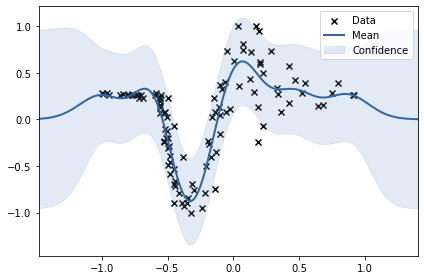

In [13]:
# import data
data = np.loadtxt('/Users/messivan/Downloads/Data/motorcycle.txt')
X_train, X_test, y_train, y_test=prepare(data)
t1=time.time()
m_full=GPy.models.GPRegression(X_train,y_train)
m_full.optimize('bfgs')
t2=time.time()
m_full.plot()

In [14]:
print(m_full)
y_pred,std=m_full.predict(X_test)
R_square=r2_score(y_test,y_pred)
rmse = rmse_score(y_test, y_pred, squared=False)
cpu_t=t2-t1
print('R_square:',R_square,'RMSE:',rmse)
print("cpu operation time", cpu_t)


Name : GP regression
Objective : 9.51834980785788
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |  0.18663916043282064  |      +ve      |        
  rbf.lengthscale          |    0.179380491960763  |      +ve      |        
  Gaussian_noise.variance  |  0.05153552620277497  |      +ve      |        
R_square: 0.8186054564574212 RMSE: 0.17722096350033112
cpu operation time 0.10908317565917969


### higdon

{'dataplot': [<matplotlib.collections.PathCollection at 0x7f7f2a9ed1f0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f7f2a889670>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f7f2a889820>]}

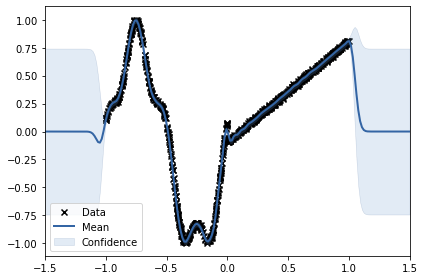

In [16]:
# import data
data = np.loadtxt('/Users/messivan/Downloads/Data/higdon.txt')
X_train, X_test, y_train, y_test=prepare(data)
t1=time.time()
m_full=GPy.models.GPRegression(X_train,y_train)
m_full.optimize('bfgs')
t2=time.time()
m_full.plot()

In [17]:
print(m_full)
y_pred,std=m_full.predict(X_test)
R_square=r2_score(y_test,y_pred)
rmse = rmse_score(y_test, y_pred, squared=False)
cpu_t=t2-t1
print('R_square:',R_square,'RMSE:',rmse)
print("cpu operation time", cpu_t)


Name : GP regression
Objective : -2156.9433084516313
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     0.1432571658727101  |      +ve      |        
  rbf.lengthscale          |    0.04045587708475808  |      +ve      |        
  Gaussian_noise.variance  |  0.0001374840477997012  |      +ve      |        
R_square: 0.999525412994855 RMSE: 0.011976801745552334
cpu operation time 2.288350820541382


### nasa

In [19]:
data = np.loadtxt('/Users/messivan/Downloads/Data/nasa.txt')
X_train, X_test, y_train, y_test=prepare(data)
t1=time.time()
m_full=GPy.models.GPRegression(X_train,y_train)
m_full.optimize('bfgs')
t2=time.time()
print(m_full)
y_pred,std=m_full.predict(X_test)
R_square=r2_score(y_test,y_pred)
rmse = rmse_score(y_test, y_pred, squared=False)
cpu_t=t2-t1
print('R_square:',R_square,'RMSE:',rmse)
print("cpu operation time", cpu_t)


Name : GP regression
Objective : -2356.692502029344
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     0.1399548216570572  |      +ve      |        
  rbf.lengthscale          |     0.5341607913997306  |      +ve      |        
  Gaussian_noise.variance  |  0.0074520787203289935  |      +ve      |        
R_square: 0.959374457519638 RMSE: 0.09013777954901671
cpu operation time 20.237337112426758


### bernholdt

In [20]:
data = np.loadtxt('/Users/messivan/Downloads/Data/bernholdt.txt')
X_train, X_test, y_train, y_test=prepare(data)
t1=time.time()
m_full=GPy.models.GPRegression(X_train,y_train)
m_full.optimize('bfgs')
t2=time.time()
print(m_full)
y_pred,std=m_full.predict(X_test)
R_square=r2_score(y_test,y_pred)
rmse = rmse_score(y_test, y_pred, squared=False)
cpu_t=t2-t1
print('R_square:',R_square,'RMSE:',rmse)
print("cpu operation time", cpu_t)


Name : GP regression
Objective : -2986.2656291055296
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  rbf.variance             |   0.18144288929361074  |      +ve      |        
  rbf.lengthscale          |   0.04411619732494266  |      +ve      |        
  Gaussian_noise.variance  |  0.012546749445343449  |      +ve      |        
R_square: 0.9600351087448756 RMSE: 0.12511418429277263
cpu operation time 895.3115539550781


In [ ]:
m_full.plot()

### Sparse GP 

In [28]:
data = np.loadtxt('/Users/messivan/Downloads/Data/motorcycle.txt')
X_train, X_test, y_train, y_test=prepare(data)

model = pyGPs.GPR_FITC()
t1=time.time()
model.setData(X_train,y_train)
model.optimize()
t2=time.time()

output=model.predict(X_test,y_test)
y_pred=output[0]
R_square=r2_score(y_test,y_pred)
rmse = rmse_score(y_test, y_pred, squared=False)
print('R_square:',R_square,'RMSE:',rmse)
print('time:', t2-t1)

# predict value variance boxplot
s_1=output[1]

Number of line searches 34


R_square: 0.3646753581904907 RMSE: 0.33166590903924276
time: 0.12428092956542969


In [29]:
data = np.loadtxt('/Users/messivan/Downloads/Data/higdon.txt')
X_train, X_test, y_train, y_test=prepare(data)

model = pyGPs.GPR_FITC()
t1=time.time()
model.setData(X_train,y_train)
model.optimize()
t2=time.time()

output=model.predict(X_test,y_test)
y_pred=output[0]
R_square=r2_score(y_test,y_pred)
rmse = rmse_score(y_test, y_pred, squared=False)
print('R_square:',R_square,'RMSE:',rmse)
print('time:', t2-t1)

# predict value variance boxplot
s_2=output[1]


Number of line searches 40


R_square: 0.7539735871649853 RMSE: 0.27269288501053474
time: 0.1431279182434082


In [30]:
data = np.loadtxt('/Users/messivan/Downloads/Data/nasa.txt')
X_train, X_test, y_train, y_test=prepare(data)

model = pyGPs.GPR_FITC()
t1=time.time()
model.setData(X_train,y_train)
model.optimize()
t2=time.time()


output=model.predict(X_test,y_test)
y_pred=output[0]
R_square=r2_score(y_test,y_pred)
rmse = rmse_score(y_test, y_pred, squared=False)
print('R_square:',R_square,'RMSE:',rmse)
print('time:', t2-t1)

# predict value variance boxplot
s_3=output[1]

Number of line searches 30


R_square: 0.9543621056291386 RMSE: 0.09553666311716028
time: 3.7936458587646484


In [31]:
data = np.loadtxt('/Users/messivan/Downloads/Data/bernholdt.txt')
X_train, X_test, y_train, y_test=prepare(data)

model = pyGPs.GPR_FITC()
t1=time.time()
model.setData(X_train,y_train)
model.optimize()
t2=time.time()


output=model.predict(X_test,y_test)
y_pred=output[0]
R_square=r2_score(y_test,y_pred)
rmse = rmse_score(y_test, y_pred, squared=False)
print('R_square:',R_square,'RMSE:',rmse)
print('time:', t2-t1)

# predict value variance boxplot
s_4=output[1]

Number of line searches 40


R_square: 0.4741547919392026 RMSE: 0.4538331247002358
time: 1.815295934677124


Text(0, 0.5, 'prediction variance')

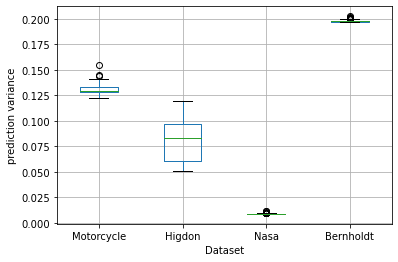

In [46]:
s1 = pd.Series(s_1.reshape(-1,))
s2 = pd.Series(s_2.reshape(-1,))
s3 = pd.Series(s_3.reshape(-1,))
s4 = pd.Series(s_4.reshape(-1,))
# 把四个list导入到pandas的数据结构中，dataframe
data = pd.DataFrame({"Motorcycle": s1, "Higdon": s2, "Nasa": s3, "Bernholdt": s4})
s=data.boxplot() # 这里，pandas自己有处理的过程，很方便哦。
s.set_xlabel('Dataset')
s.set_ylabel('prediction variance')

### MGP

In [113]:
data = np.loadtxt('/Users/messivan/Downloads/Data/higdon.txt')

X = data[:,:-1]
if len(X.shape) == 1: X = X.reshape(-1,1)
y = data[:,-1].reshape(-1,1)

# We normalize both X and y with MinMaxScaler()
scaler_x = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))
scaler_x.fit(X)
scaler_y.fit(y)
X = scaler_x.transform(X)
y = scaler_y.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

### motorcycle

Number of clusters is 6


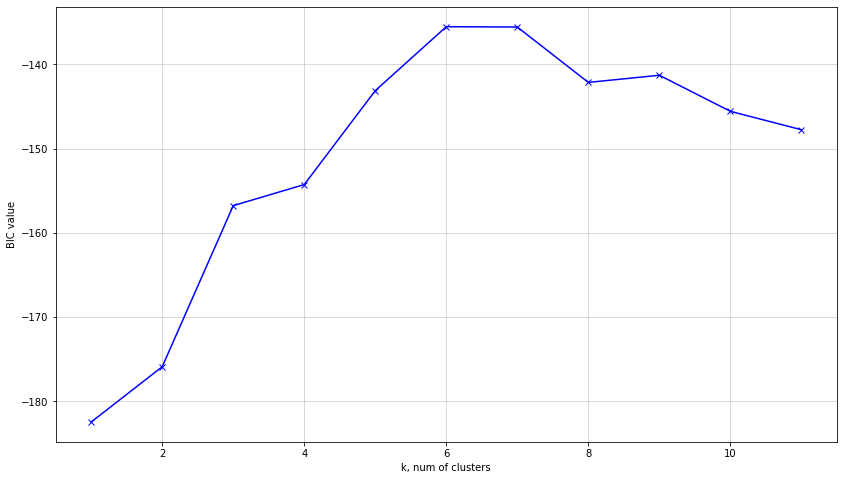

In [50]:
DeepMixtureGPE.estimate_n_experts(np.concatenate((X,y), axis=1), criterion='BIC', random_state=11)


In [109]:
m = DeepMixtureGPE(n_experts=5, sparse_gp=0, fix_ind_pnts=1, initial_clustering='GMM', random_state=11)


In [102]:
t1=time.time()
m.fit(X_train, y_train, mode='CCR', verbose=1)
t2=time.time()
t2-t1

Epoch 1/500
6/6 [==============================] - 1s 47ms/step - loss: 1.7775 - accuracy: 0.2737 - val_loss: 1.7284 - val_accuracy: 0.4545
Epoch 2/500
6/6 [==============================] - 0s 7ms/step - loss: 1.7219 - accuracy: 0.3474 - val_loss: 1.6714 - val_accuracy: 0.4545
Epoch 3/500
6/6 [==============================] - 0s 8ms/step - loss: 1.6690 - accuracy: 0.3474 - val_loss: 1.6120 - val_accuracy: 0.4545
Epoch 4/500
6/6 [==============================] - 0s 7ms/step - loss: 1.6139 - accuracy: 0.3474 - val_loss: 1.5485 - val_accuracy: 0.4545
Epoch 5/500
6/6 [==============================] - 0s 8ms/step - loss: 1.5578 - accuracy: 0.3474 - val_loss: 1.4929 - val_accuracy: 0.4545
Epoch 6/500
6/6 [==============================] - 0s 7ms/step - loss: 1.5059 - accuracy: 0.3474 - val_loss: 1.4501 - val_accuracy: 0.4545
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 1.4549 - accuracy: 0.3474 - val_loss: 1.4170 - val_accuracy: 0.4545
Epoch 8/500
6/6 [=========

6/6 [==============================] - 0s 6ms/step - loss: 0.4888 - accuracy: 0.8105 - val_loss: 0.5093 - val_accuracy: 0.7273
Epoch 60/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4876 - accuracy: 0.8316 - val_loss: 0.4770 - val_accuracy: 0.8182
Epoch 61/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4895 - accuracy: 0.8105 - val_loss: 0.4763 - val_accuracy: 0.8182
Epoch 62/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4776 - accuracy: 0.8316 - val_loss: 0.5035 - val_accuracy: 0.7273
Epoch 63/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4826 - accuracy: 0.8105 - val_loss: 0.4905 - val_accuracy: 0.8182
Epoch 64/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4776 - accuracy: 0.7895 - val_loss: 0.4668 - val_accuracy: 0.9091
Epoch 65/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4807 - accuracy: 0.8211 - val_loss: 0.4648 - val_accuracy: 0.9091
Epoch 66/500
6/6 [===============

6/6 [==============================] - 0s 6ms/step - loss: 0.4418 - accuracy: 0.8421 - val_loss: 0.4688 - val_accuracy: 0.8182
Epoch 118/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4409 - accuracy: 0.8421 - val_loss: 0.4788 - val_accuracy: 0.8182
Epoch 119/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4468 - accuracy: 0.8316 - val_loss: 0.4596 - val_accuracy: 0.8182
Epoch 120/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4410 - accuracy: 0.8316 - val_loss: 0.4546 - val_accuracy: 0.8182
Epoch 121/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4506 - accuracy: 0.8316 - val_loss: 0.4522 - val_accuracy: 0.8182
Epoch 122/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4375 - accuracy: 0.8316 - val_loss: 0.4530 - val_accuracy: 0.9091
Epoch 123/500
6/6 [==============================] - 0s 17ms/step - loss: 0.4478 - accuracy: 0.8000 - val_loss: 0.4673 - val_accuracy: 0.9091
Epoch 124/500
6/6 [=======

Optimization restart 1/2, f = 23.169291221423826


Optimization restart 2/2, f = 23.169291221566688


Optimization restart 1/2, f = 19.865140109616057


Optimization restart 2/2, f = 19.865139523944503


Optimization restart 1/2, f = 14.18938553929291


Optimization restart 2/2, f = 14.189385401213876


Optimization restart 1/2, f = 24.23660599276357


Optimization restart 2/2, f = 24.236605991647398


Optimization restart 1/2, f = 29.8554944181001


Optimization restart 2/2, f = 29.855494418064737


Optimization restart 1/2, f = 24.121955115583134


Optimization restart 2/2, f = 24.12196415899008


9.478755712509155

In [103]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 76.89 %. Soft_pred: 76.96 %.
RMSE. Hard_pred: 0.2001. Soft_pred: 0.1997.


In [106]:
t1=time.time()
m.fit(X_train, y_train, mode='CCR-MM', verbose=1)
t2=time.time()
t2-t1

  0%|                                                     | 0/6 [00:00<?, ?it/s]

Optimization restart 1/2, f = 22.511274393674363


Optimization restart 2/2, f = 22.511274394201187


Optimization restart 1/2, f = 18.446246966619558


Optimization restart 2/2, f = 18.44620194599576


Optimization restart 1/2, f = 17.027262732740652


Optimization restart 2/2, f = 17.027262431682086


Optimization restart 1/2, f = 31.296105407293318


Optimization restart 2/2, f = 31.29610540651163


Optimization restart 1/2, f = 17.17327621470033


Optimization restart 2/2, f = 17.173276214101396


Optimization restart 1/2, f = 18.446200963780157


Optimization restart 2/2, f = 18.44620095931102
Epoch 1/500
6/6 [==============================] - 1s 43ms/step - loss: 1.7775 - accuracy: 0.2737 - val_loss: 1.7284 - val_accuracy: 0.4545
Epoch 2/500
6/6 [==============================] - 0s 6ms/step - loss: 1.7219 - accuracy: 0.3474 - val_loss: 1.6714 - val_accuracy: 0.4545
Epoch 3/500
6/6 [==============================] - 0s 5ms/step - loss: 1.6690 - accuracy: 0.3474 - val_loss: 1.6120 - val_accuracy: 0.4545
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 1.6139 - accuracy: 0.3474 - val_loss: 1.5485 - val_accuracy: 0.4545
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 1.5578 - accuracy: 0.3474 - val_loss: 1.4929 - val_accuracy: 0.4545
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 1.5059 - accuracy: 0.3474 - val_loss: 1.4501 - val_accuracy: 0.4545
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 1.4549 - accuracy: 0.3474 - val_loss: 1.4170 -

6/6 [==============================] - 0s 5ms/step - loss: 0.4888 - accuracy: 0.8105 - val_loss: 0.5093 - val_accuracy: 0.7273
Epoch 60/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4876 - accuracy: 0.8316 - val_loss: 0.4770 - val_accuracy: 0.8182
Epoch 61/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4895 - accuracy: 0.8105 - val_loss: 0.4763 - val_accuracy: 0.8182
Epoch 62/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4776 - accuracy: 0.8316 - val_loss: 0.5035 - val_accuracy: 0.7273
Epoch 63/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4826 - accuracy: 0.8105 - val_loss: 0.4905 - val_accuracy: 0.8182
Epoch 64/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4776 - accuracy: 0.7895 - val_loss: 0.4668 - val_accuracy: 0.9091
Epoch 65/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4807 - accuracy: 0.8211 - val_loss: 0.4648 - val_accuracy: 0.9091
Epoch 66/500
6/6 [===============

6/6 [==============================] - 0s 5ms/step - loss: 0.4418 - accuracy: 0.8421 - val_loss: 0.4688 - val_accuracy: 0.8182
Epoch 118/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4409 - accuracy: 0.8421 - val_loss: 0.4788 - val_accuracy: 0.8182
Epoch 119/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4468 - accuracy: 0.8316 - val_loss: 0.4596 - val_accuracy: 0.8182
Epoch 120/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4410 - accuracy: 0.8316 - val_loss: 0.4546 - val_accuracy: 0.8182
Epoch 121/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4506 - accuracy: 0.8316 - val_loss: 0.4522 - val_accuracy: 0.8182
Epoch 122/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4375 - accuracy: 0.8316 - val_loss: 0.4530 - val_accuracy: 0.9091
Epoch 123/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4478 - accuracy: 0.8000 - val_loss: 0.4673 - val_accuracy: 0.9091
Epoch 124/500
6/6 [========

 17%|███████▌                                     | 1/6 [00:07<00:38,  7.76s/it]

Optimization restart 1/2, f = 24.89318536685977


Optimization restart 2/2, f = 24.893185366722488


Optimization restart 1/2, f = 18.446246966619558


Optimization restart 2/2, f = 18.44620194599576


Optimization restart 1/2, f = 17.027262732740652


Optimization restart 2/2, f = 17.027262431682086


Optimization restart 1/2, f = 31.29610540729331


Optimization restart 2/2, f = 31.29610540651163


Optimization restart 1/2, f = 16.927424059279907


Optimization restart 2/2, f = 16.92742405248137


Optimization restart 1/2, f = 18.446200963780157


Optimization restart 2/2, f = 18.44620095931102
Epoch 1/500
6/6 [==============================] - 1s 41ms/step - loss: 1.7776 - accuracy: 0.2632 - val_loss: 1.7286 - val_accuracy: 0.4545
Epoch 2/500
6/6 [==============================] - 0s 6ms/step - loss: 1.7226 - accuracy: 0.3368 - val_loss: 1.6720 - val_accuracy: 0.4545
Epoch 3/500
6/6 [==============================] - 0s 7ms/step - loss: 1.6701 - accuracy: 0.3368 - val_loss: 1.6132 - val_accuracy: 0.4545
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 1.6147 - accuracy: 0.3368 - val_loss: 1.5517 - val_accuracy: 0.4545
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 1.5586 - accuracy: 0.3368 - val_loss: 1.4976 - val_accuracy: 0.4545
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 1.5055 - accuracy: 0.3474 - val_loss: 1.4584 - val_accuracy: 0.4545
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 1.4532 - accuracy: 0.3368 - val_loss: 1.4262 -

6/6 [==============================] - 0s 5ms/step - loss: 0.5067 - accuracy: 0.8105 - val_loss: 0.5403 - val_accuracy: 0.7273
Epoch 60/500
6/6 [==============================] - 0s 7ms/step - loss: 0.5012 - accuracy: 0.8211 - val_loss: 0.5003 - val_accuracy: 0.8182
Epoch 61/500
6/6 [==============================] - 0s 6ms/step - loss: 0.5042 - accuracy: 0.8105 - val_loss: 0.5077 - val_accuracy: 0.7273
Epoch 62/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4979 - accuracy: 0.8105 - val_loss: 0.5402 - val_accuracy: 0.7273
Epoch 63/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4950 - accuracy: 0.7895 - val_loss: 0.5171 - val_accuracy: 0.7273
Epoch 64/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4950 - accuracy: 0.8000 - val_loss: 0.4850 - val_accuracy: 0.9091
Epoch 65/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4965 - accuracy: 0.7895 - val_loss: 0.4867 - val_accuracy: 0.9091
Epoch 66/500
6/6 [===============

6/6 [==============================] - 0s 5ms/step - loss: 0.4537 - accuracy: 0.8316 - val_loss: 0.4822 - val_accuracy: 0.8182
Epoch 118/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4589 - accuracy: 0.8105 - val_loss: 0.5118 - val_accuracy: 0.8182
Epoch 119/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4576 - accuracy: 0.8211 - val_loss: 0.4830 - val_accuracy: 0.8182
Epoch 120/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4547 - accuracy: 0.8211 - val_loss: 0.4723 - val_accuracy: 0.8182
Epoch 121/500
6/6 [==============================] - 0s 7ms/step - loss: 0.4622 - accuracy: 0.8211 - val_loss: 0.4712 - val_accuracy: 0.8182
Epoch 122/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4523 - accuracy: 0.8105 - val_loss: 0.4695 - val_accuracy: 0.8182
Epoch 123/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4610 - accuracy: 0.8105 - val_loss: 0.4875 - val_accuracy: 0.8182
Epoch 124/500
6/6 [========

 33%|███████████████                              | 2/6 [00:15<00:31,  7.76s/it]

Optimization restart 1/2, f = 24.89318536685977


Optimization restart 2/2, f = 24.893185366722488


Optimization restart 1/2, f = 18.446246966619558


Optimization restart 2/2, f = 18.44620194599576


Optimization restart 1/2, f = 17.027262732740652


Optimization restart 2/2, f = 17.027262431682086


Optimization restart 1/2, f = 31.296105407293314


Optimization restart 2/2, f = 31.29610540651163


Optimization restart 1/2, f = 16.927424059279907


Optimization restart 2/2, f = 16.92742405248137


Optimization restart 1/2, f = 18.446200963780157


Optimization restart 2/2, f = 18.44620095931102
Epoch 1/500
6/6 [==============================] - 1s 34ms/step - loss: 1.7776 - accuracy: 0.2632 - val_loss: 1.7286 - val_accuracy: 0.4545
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 1.7226 - accuracy: 0.3368 - val_loss: 1.6720 - val_accuracy: 0.4545
Epoch 3/500
6/6 [==============================] - 0s 11ms/step - loss: 1.6701 - accuracy: 0.3368 - val_loss: 1.6132 - val_accuracy: 0.4545
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 1.6147 - accuracy: 0.3368 - val_loss: 1.5517 - val_accuracy: 0.4545
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 1.5586 - accuracy: 0.3368 - val_loss: 1.4976 - val_accuracy: 0.4545
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 1.5055 - accuracy: 0.3474 - val_loss: 1.4584 - val_accuracy: 0.4545
Epoch 7/500
6/6 [==============================] - 0s 4ms/step - loss: 1.4532 - accuracy: 0.3368 - val_loss: 1.4262 

6/6 [==============================] - 0s 6ms/step - loss: 0.5067 - accuracy: 0.8105 - val_loss: 0.5403 - val_accuracy: 0.7273
Epoch 60/500
6/6 [==============================] - 0s 8ms/step - loss: 0.5012 - accuracy: 0.8211 - val_loss: 0.5003 - val_accuracy: 0.8182
Epoch 61/500
6/6 [==============================] - 0s 7ms/step - loss: 0.5042 - accuracy: 0.8105 - val_loss: 0.5077 - val_accuracy: 0.7273
Epoch 62/500
6/6 [==============================] - 0s 7ms/step - loss: 0.4979 - accuracy: 0.8105 - val_loss: 0.5402 - val_accuracy: 0.7273
Epoch 63/500
6/6 [==============================] - 0s 7ms/step - loss: 0.4950 - accuracy: 0.7895 - val_loss: 0.5171 - val_accuracy: 0.7273
Epoch 64/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4950 - accuracy: 0.8000 - val_loss: 0.4850 - val_accuracy: 0.9091
Epoch 65/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4965 - accuracy: 0.7895 - val_loss: 0.4867 - val_accuracy: 0.9091
Epoch 66/500
6/6 [===============

6/6 [==============================] - 0s 6ms/step - loss: 0.4537 - accuracy: 0.8316 - val_loss: 0.4822 - val_accuracy: 0.8182
Epoch 118/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4589 - accuracy: 0.8105 - val_loss: 0.5118 - val_accuracy: 0.8182
Epoch 119/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4576 - accuracy: 0.8211 - val_loss: 0.4830 - val_accuracy: 0.8182
Epoch 120/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4547 - accuracy: 0.8211 - val_loss: 0.4723 - val_accuracy: 0.8182
Epoch 121/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4622 - accuracy: 0.8211 - val_loss: 0.4712 - val_accuracy: 0.8182
Epoch 122/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4523 - accuracy: 0.8105 - val_loss: 0.4695 - val_accuracy: 0.8182
Epoch 123/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4610 - accuracy: 0.8105 - val_loss: 0.4875 - val_accuracy: 0.8182
Epoch 124/500
6/6 [========

 33%|███████████████                              | 2/6 [00:23<00:46, 11.70s/it]


23.63933515548706

In [107]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 70.55 %. Soft_pred: 78.12 %.
RMSE. Hard_pred: 0.2258. Soft_pred: 0.1946.


In [110]:
t1=time.time()
m.fit(X_train, y_train, mode='MM2r', verbose=1)
t2=time.time()
t2-t1

  0%|                                                     | 0/2 [00:00<?, ?it/s]

Optimization restart 1/2, f = 26.13013624507637


Optimization restart 2/2, f = 26.130136245127552


Optimization restart 1/2, f = 25.29197513962803


Optimization restart 2/2, f = 25.291975140392942


Optimization restart 1/2, f = 21.02988404384936


Optimization restart 2/2, f = 21.029884043843445


Optimization restart 1/2, f = 21.04737781505007


Optimization restart 2/2, f = 21.047377815029208


Optimization restart 1/2, f = 25.37895523613334


Optimization restart 2/2, f = 25.37895523618211
Epoch 1/500
6/6 [==============================] - 1s 36ms/step - loss: 1.6263 - accuracy: 0.1895 - val_loss: 1.6216 - val_accuracy: 0.1818
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 1.6194 - accuracy: 0.2421 - val_loss: 1.6230 - val_accuracy: 0.0909
Epoch 3/500
6/6 [==============================] - 0s 5ms/step - loss: 1.6153 - accuracy: 0.2105 - val_loss: 1.6250 - val_accuracy: 0.1818
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 1.6120 - accuracy: 0.2211 - val_loss: 1.6260 - val_accuracy: 0.1818
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 1.6081 - accuracy: 0.2316 - val_loss: 1.6271 - val_accuracy: 0.1818
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 1.6037 - accuracy: 0.2316 - val_loss: 1.6290 - val_accuracy: 0.1818
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 1.5991 - accuracy: 0.2632 - val_loss: 1.6321 -

 50%|██████████████████████▌                      | 1/2 [00:03<00:03,  3.23s/it]

Optimization restart 1/2, f = 5.209378166647669


Optimization restart 2/2, f = 5.209378167263013


Optimization restart 1/2, f = 21.284078112997506


Optimization restart 2/2, f = 16.81668408522061


Optimization restart 1/2, f = 20.32785596377289


Optimization restart 2/2, f = 20.327855967321256


Optimization restart 1/2, f = 7.0946926825576355


Optimization restart 2/2, f = 7.094692694978162


Optimization restart 1/2, f = 36.24481917972262


Optimization restart 2/2, f = 36.24481917971299
Epoch 1/500
6/6 [==============================] - 1s 34ms/step - loss: 1.6109 - accuracy: 0.3053 - val_loss: 1.5742 - val_accuracy: 0.4545
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 1.5776 - accuracy: 0.4316 - val_loss: 1.5396 - val_accuracy: 0.4545
Epoch 3/500
6/6 [==============================] - 0s 5ms/step - loss: 1.5537 - accuracy: 0.4421 - val_loss: 1.5010 - val_accuracy: 0.4545
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 1.5250 - accuracy: 0.4421 - val_loss: 1.4634 - val_accuracy: 0.4545
Epoch 5/500
6/6 [==============================] - 0s 4ms/step - loss: 1.4971 - accuracy: 0.4421 - val_loss: 1.4226 - val_accuracy: 0.4545
Epoch 6/500
6/6 [==============================] - 0s 4ms/step - loss: 1.4682 - accuracy: 0.4526 - val_loss: 1.3893 - val_accuracy: 0.4545
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 1.4420 - accuracy: 0.4526 - val_loss: 1.3519 -

6/6 [==============================] - 0s 5ms/step - loss: 0.9503 - accuracy: 0.5895 - val_loss: 0.7915 - val_accuracy: 0.6364
Epoch 60/500
6/6 [==============================] - 0s 5ms/step - loss: 0.9502 - accuracy: 0.6211 - val_loss: 0.7975 - val_accuracy: 0.7273
Epoch 61/500
6/6 [==============================] - 0s 6ms/step - loss: 0.9410 - accuracy: 0.6316 - val_loss: 0.7894 - val_accuracy: 0.6364
Epoch 62/500
6/6 [==============================] - 0s 5ms/step - loss: 0.9533 - accuracy: 0.6211 - val_loss: 0.7792 - val_accuracy: 0.6364
Epoch 63/500
6/6 [==============================] - 0s 6ms/step - loss: 0.9449 - accuracy: 0.6316 - val_loss: 0.7863 - val_accuracy: 0.6364
Epoch 64/500
6/6 [==============================] - 0s 5ms/step - loss: 0.9427 - accuracy: 0.6105 - val_loss: 0.8002 - val_accuracy: 0.7273
Epoch 65/500
6/6 [==============================] - 0s 5ms/step - loss: 0.9401 - accuracy: 0.6211 - val_loss: 0.7867 - val_accuracy: 0.6364
Epoch 66/500
6/6 [===============

6/6 [==============================] - 0s 5ms/step - loss: 0.9239 - accuracy: 0.6316 - val_loss: 0.7491 - val_accuracy: 0.6364
Epoch 118/500
6/6 [==============================] - 0s 5ms/step - loss: 0.9260 - accuracy: 0.6211 - val_loss: 0.7379 - val_accuracy: 0.6364
Epoch 119/500
6/6 [==============================] - 0s 4ms/step - loss: 0.9220 - accuracy: 0.6421 - val_loss: 0.7417 - val_accuracy: 0.6364
Epoch 120/500
6/6 [==============================] - 0s 5ms/step - loss: 0.9242 - accuracy: 0.6316 - val_loss: 0.7353 - val_accuracy: 0.6364
Epoch 121/500
6/6 [==============================] - 0s 5ms/step - loss: 0.9241 - accuracy: 0.6421 - val_loss: 0.7472 - val_accuracy: 0.6364
Epoch 122/500
6/6 [==============================] - 0s 6ms/step - loss: 0.9216 - accuracy: 0.6421 - val_loss: 0.7440 - val_accuracy: 0.6364
Epoch 123/500
6/6 [==============================] - 0s 6ms/step - loss: 0.9245 - accuracy: 0.6211 - val_loss: 0.7434 - val_accuracy: 0.6364
Epoch 124/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.9187 - accuracy: 0.6105 - val_loss: 0.7449 - val_accuracy: 0.6364
Epoch 176/500
6/6 [==============================] - 0s 6ms/step - loss: 0.9266 - accuracy: 0.6211 - val_loss: 0.7380 - val_accuracy: 0.6364
Epoch 177/500
6/6 [==============================] - 0s 7ms/step - loss: 0.9099 - accuracy: 0.6421 - val_loss: 0.7336 - val_accuracy: 0.6364
Epoch 178/500
6/6 [==============================] - 0s 8ms/step - loss: 0.9187 - accuracy: 0.6105 - val_loss: 0.7356 - val_accuracy: 0.6364
Epoch 179/500
6/6 [==============================] - 0s 8ms/step - loss: 0.9151 - accuracy: 0.6211 - val_loss: 0.7334 - val_accuracy: 0.6364
Epoch 180/500
6/6 [==============================] - 0s 7ms/step - loss: 0.9174 - accuracy: 0.6316 - val_loss: 0.7424 - val_accuracy: 0.6364
Epoch 181/500
6/6 [==============================] - 0s 7ms/step - loss: 0.9246 - accuracy: 0.6211 - val_loss: 0.7486 - val_accuracy: 0.6364
Epoch 182/500
6/6 [========

100%|█████████████████████████████████████████████| 2/2 [00:12<00:00,  6.00s/it]


12.006919860839844

In [111]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 85.88 %. Soft_pred: 83.74 %.
RMSE. Hard_pred: 0.1564. Soft_pred: 0.1678.


### MSGP

In [55]:
m = DeepMixtureGPE(n_experts=6, sparse_gp=1, fix_ind_pnts=1, initial_clustering='GMM', random_state=11)

In [56]:
m.fit(X_train, y_train, mode='CCR', verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 36ms/step - loss: 1.7775 - accuracy: 0.2737 - val_loss: 1.7284 - val_accuracy: 0.4545
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 1.7219 - accuracy: 0.3474 - val_loss: 1.6714 - val_accuracy: 0.4545
Epoch 3/500
6/6 [==============================] - 0s 7ms/step - loss: 1.6690 - accuracy: 0.3474 - val_loss: 1.6120 - val_accuracy: 0.4545
Epoch 4/500
6/6 [==============================] - 0s 7ms/step - loss: 1.6139 - accuracy: 0.3474 - val_loss: 1.5485 - val_accuracy: 0.4545
Epoch 5/500
6/6 [==============================] - 0s 6ms/step - loss: 1.5578 - accuracy: 0.3474 - val_loss: 1.4929 - val_accuracy: 0.4545
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 1.5059 - accuracy: 0.3474 - val_loss: 1.4501 - val_accuracy: 0.4545
Epoch 7/500
6/6 [==============================] - 0s 6ms/step - loss: 1.4549 - accuracy: 0.3474 - val_loss: 1.4170 - val_accuracy: 0.4545
Epoch 8/500
6/6 [=========

6/6 [==============================] - 0s 7ms/step - loss: 0.4888 - accuracy: 0.8105 - val_loss: 0.5093 - val_accuracy: 0.7273
Epoch 60/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4876 - accuracy: 0.8316 - val_loss: 0.4770 - val_accuracy: 0.8182
Epoch 61/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4895 - accuracy: 0.8105 - val_loss: 0.4763 - val_accuracy: 0.8182
Epoch 62/500
6/6 [==============================] - 0s 7ms/step - loss: 0.4776 - accuracy: 0.8316 - val_loss: 0.5035 - val_accuracy: 0.7273
Epoch 63/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4826 - accuracy: 0.8105 - val_loss: 0.4905 - val_accuracy: 0.8182
Epoch 64/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4776 - accuracy: 0.7895 - val_loss: 0.4668 - val_accuracy: 0.9091
Epoch 65/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4807 - accuracy: 0.8211 - val_loss: 0.4648 - val_accuracy: 0.9091
Epoch 66/500
6/6 [===============

6/6 [==============================] - 0s 6ms/step - loss: 0.4418 - accuracy: 0.8421 - val_loss: 0.4688 - val_accuracy: 0.8182
Epoch 118/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4409 - accuracy: 0.8421 - val_loss: 0.4788 - val_accuracy: 0.8182
Epoch 119/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4468 - accuracy: 0.8316 - val_loss: 0.4596 - val_accuracy: 0.8182
Epoch 120/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4410 - accuracy: 0.8316 - val_loss: 0.4546 - val_accuracy: 0.8182
Epoch 121/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4506 - accuracy: 0.8316 - val_loss: 0.4522 - val_accuracy: 0.8182
Epoch 122/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4375 - accuracy: 0.8316 - val_loss: 0.4530 - val_accuracy: 0.9091
Epoch 123/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4478 - accuracy: 0.8000 - val_loss: 0.4673 - val_accuracy: 0.9091
Epoch 124/500
6/6 [========

Optimization restart 1/2, f = 23.78243787221387


Optimization restart 2/2, f = 23.830189716396603


Optimization restart 1/2, f = 19.865139502195646


Optimization restart 2/2, f = 19.865141085175782


Optimization restart 1/2, f = 14.189385362970208


Optimization restart 2/2, f = 14.18939175876727


Optimization restart 1/2, f = 24.280096021840706


Optimization restart 2/2, f = 24.278268827882783


Optimization restart 1/2, f = 32.68955887406962


Optimization restart 2/2, f = 29.875169146134795


Optimization restart 1/2, f = 24.121955113184097


Optimization restart 2/2, f = 27.065241939523297


In [57]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 76.87 %. Soft_pred: 77.70 %.
RMSE. Hard_pred: 0.2001. Soft_pred: 0.1965.


### Higdon

Number of clusters is 11


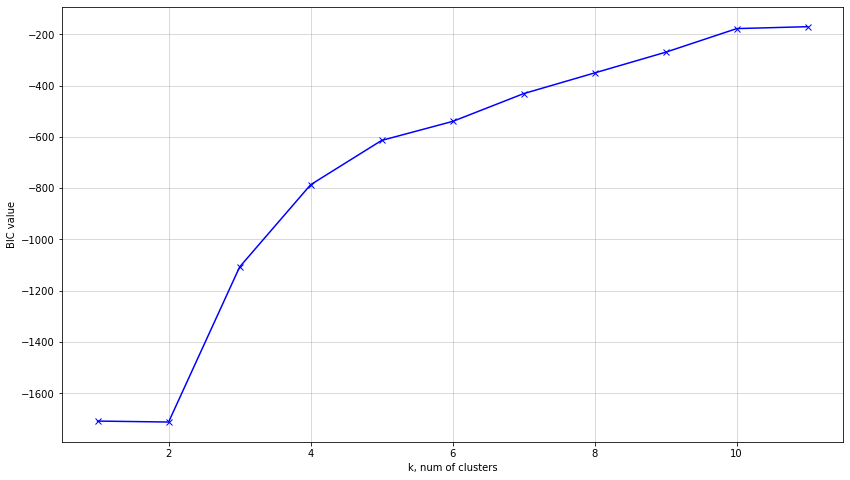

In [60]:
data = np.loadtxt('/Users/messivan/Downloads/Data/higdon.txt')
X = data[:,:-1]
if len(X.shape) == 1: X = X.reshape(-1,1)
y = data[:,-1].reshape(-1,1)

# We normalize both X and y with MinMaxScaler()
scaler_x = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))
scaler_x.fit(X)
scaler_y.fit(y)
X = scaler_x.transform(X)
y = scaler_y.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
DeepMixtureGPE.estimate_n_experts(np.concatenate((X,y), axis=1), criterion='BIC', random_state=11)

In [127]:
m = DeepMixtureGPE(n_experts=8, sparse_gp=0, fix_ind_pnts=1, initial_clustering='GMM', random_state=11)

In [115]:
t1=time.time()
m.fit(X_train, y_train, mode='CCR', verbose=0)
t2=time.time()
t2-t1

Optimization restart 1/2, f = -52.08289706483423
Optimization restart 2/2, f = -52.08289706480763
Optimization restart 1/2, f = -43.835401957817524
Optimization restart 2/2, f = -43.835401957587735
Optimization restart 1/2, f = -62.494594458885516
Optimization restart 2/2, f = -62.494594457604194
Optimization restart 1/2, f = 2.8378772288168737
Optimization restart 2/2, f = 2.8378771106521885
Optimization restart 1/2, f = -37.806202106194206
Optimization restart 2/2, f = -37.8062021030953
Optimization restart 1/2, f = -12.970522093022709
Optimization restart 2/2, f = -12.970522258545763
Optimization restart 1/2, f = 139.05597788790493
Optimization restart 2/2, f = 139.0559765203377
Optimization restart 1/2, f = -13.266601371489145
Optimization restart 2/2, f = -13.266601365296196
Optimization restart 1/2, f = -81.26503912919256
Optimization restart 2/2, f = -81.26503912915305
Optimization restart 1/2, f = -204.28063184597255
Optimization restart 2/2, f = -204.28063184671157
Optimizatio

11.469688653945923

In [116]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 99.82 %. Soft_pred: 99.82 %.
RMSE. Hard_pred: 0.0232. Soft_pred: 0.0233.


In [120]:
t1=time.time()
m.fit(X_train, y_train, mode='CCR-MM', verbose=0)
t2=time.time()
t2-t1

  0%|                                                     | 0/6 [00:00<?, ?it/s]

Optimization restart 1/2, f = -58.094655689428194
Optimization restart 2/2, f = -58.09465569230055
Optimization restart 1/2, f = -453.96940155364206
Optimization restart 2/2, f = -453.96916461868557
Optimization restart 1/2, f = 153.2453617942969
Optimization restart 2/2, f = -18.407823776062436
Optimization restart 1/2, f = -92.40385341692215
Optimization restart 2/2, f = -92.40385340990494
Optimization restart 1/2, f = -53.50031692472681
Optimization restart 2/2, f = -53.50031853725987
Optimization restart 1/2, f = -12.34499518938772
Optimization restart 2/2, f = -12.344995189812444
Optimization restart 1/2, f = -75.7426583931282
Optimization restart 2/2, f = -75.74265839373975
Optimization restart 1/2, f = -6.370471718063868
Optimization restart 2/2, f = -6.370471718326721
Optimization restart 1/2, f = -82.34148699354847
Optimization restart 2/2, f = -82.34148698611166


 17%|███████▌                                     | 1/6 [00:09<00:48,  9.77s/it]

Optimization restart 1/2, f = -64.4371878734554
Optimization restart 2/2, f = -64.43718787353099
Optimization restart 1/2, f = -490.0789857373234
Optimization restart 2/2, f = -490.07894139256325
Optimization restart 1/2, f = 154.664300635209
Optimization restart 2/2, f = -22.371924715402983
Optimization restart 1/2, f = -95.71157986629498
Optimization restart 2/2, f = -95.7115798663102
Optimization restart 1/2, f = -26.828949772663044
Optimization restart 2/2, f = -26.828949774026768
Optimization restart 1/2, f = -11.698137920597365
Optimization restart 2/2, f = -11.698137920636803
Optimization restart 1/2, f = -75.7426583931282
Optimization restart 2/2, f = -75.74265839373975
Optimization restart 1/2, f = -6.047935740024071
Optimization restart 2/2, f = -6.047935750292268
Optimization restart 1/2, f = -76.97697122936862
Optimization restart 2/2, f = -76.97697128815962


 33%|███████████████                              | 2/6 [00:19<00:39,  9.92s/it]

Optimization restart 1/2, f = -58.83354771519461
Optimization restart 2/2, f = -58.83354771523925
Optimization restart 1/2, f = -486.9082284426412
Optimization restart 2/2, f = -486.90806696282004
Optimization restart 1/2, f = 151.8264232399598
Optimization restart 2/2, f = -25.525876349447252
Optimization restart 1/2, f = -103.66150371251116
Optimization restart 2/2, f = -103.66150370996102
Optimization restart 1/2, f = -27.911541436484512
Optimization restart 2/2, f = -27.911541436265843
Optimization restart 1/2, f = -12.34499518938772
Optimization restart 2/2, f = -12.344995189812444
Optimization restart 1/2, f = -81.14659467639922
Optimization restart 2/2, f = -81.14659465905531
Optimization restart 1/2, f = -8.218415360227857
Optimization restart 2/2, f = -8.21841536021857
Optimization restart 1/2, f = -70.0049904233729
Optimization restart 2/2, f = -70.00499023409816


 50%|██████████████████████▌                      | 3/6 [00:31<00:31, 10.53s/it]

Optimization restart 1/2, f = -61.36705114915364
Optimization restart 2/2, f = -61.36705114841807
Optimization restart 1/2, f = -471.80552423011875
Optimization restart 2/2, f = -471.80166817063366
Optimization restart 1/2, f = 154.66430903118038
Optimization restart 2/2, f = -28.252902134893986
Optimization restart 1/2, f = -105.10884705601565
Optimization restart 2/2, f = -105.10884705843272
Optimization restart 1/2, f = -35.52293953183459
Optimization restart 2/2, f = -35.52293953181576
Optimization restart 1/2, f = -10.894538444762443
Optimization restart 2/2, f = -10.894538444814657
Optimization restart 1/2, f = -84.74918528724686
Optimization restart 2/2, f = -84.74918529189455
Optimization restart 1/2, f = -3.7134082045809613
Optimization restart 2/2, f = -3.7134082045576644
Optimization restart 1/2, f = -69.7151862014623
Optimization restart 2/2, f = -69.71518612189502


 67%|██████████████████████████████               | 4/6 [00:43<00:22, 11.25s/it]

Optimization restart 1/2, f = -69.31908839976215
Optimization restart 2/2, f = -69.31908840184751
Optimization restart 1/2, f = -474.88924998803884
Optimization restart 2/2, f = -474.8892501212533
Optimization restart 1/2, f = 150.40748502959485
Optimization restart 2/2, f = -25.5039640597863
Optimization restart 1/2, f = -105.10884705601565
Optimization restart 2/2, f = -105.10884705843272
Optimization restart 1/2, f = -33.37113829400825
Optimization restart 2/2, f = -33.371138567769506
Optimization restart 1/2, f = -10.430751274472627
Optimization restart 2/2, f = -10.430751274489221
Optimization restart 1/2, f = -79.13529594910554
Optimization restart 2/2, f = -79.13529582864317
Optimization restart 1/2, f = -9.085430008198475
Optimization restart 2/2, f = -9.085430008192981
Optimization restart 1/2, f = -76.21812612326792
Optimization restart 2/2, f = -76.2181261283142


 83%|█████████████████████████████████████▌       | 5/6 [00:55<00:11, 11.71s/it]

Optimization restart 1/2, f = -72.07420727731227
Optimization restart 2/2, f = -72.0742072776262
Optimization restart 1/2, f = -474.88924998803884
Optimization restart 2/2, f = -474.8892501212533
Optimization restart 1/2, f = 154.66430903118038
Optimization restart 2/2, f = -28.252902134893986
Optimization restart 1/2, f = -105.10884705601565
Optimization restart 2/2, f = -105.10884705843272
Optimization restart 1/2, f = -33.37113829403131
Optimization restart 2/2, f = -33.3711385677726
Optimization restart 1/2, f = -10.336219162966511
Optimization restart 2/2, f = -10.336219162893194
Optimization restart 1/2, f = -75.24610788011135
Optimization restart 2/2, f = -75.2461078800153
Optimization restart 1/2, f = -9.085430008198475
Optimization restart 2/2, f = -9.085430008192981
Optimization restart 1/2, f = -72.91502722931818
Optimization restart 2/2, f = -72.91502705324572


100%|█████████████████████████████████████████████| 6/6 [01:06<00:00, 11.01s/it]


66.42944574356079

In [121]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 99.97 %. Soft_pred: 99.95 %.
RMSE. Hard_pred: 0.0098. Soft_pred: 0.0125.


In [128]:
t1=time.time()
m.fit(X_train, y_train, mode='MM2r', verbose=0)
t2=time.time()
t2-t1

  0%|                                                     | 0/2 [00:00<?, ?it/s]

Optimization restart 1/2, f = -103.94744331048089
Optimization restart 2/2, f = -7.614700766718968
Optimization restart 1/2, f = -123.15129791670527
Optimization restart 2/2, f = -123.15129791669253
Optimization restart 1/2, f = -103.59049187742612
Optimization restart 2/2, f = -103.59049187835117
Optimization restart 1/2, f = -150.62657296737078
Optimization restart 2/2, f = -150.6265729654033
Optimization restart 1/2, f = -160.39566803439925
Optimization restart 2/2, f = -160.39566805096933
Optimization restart 1/2, f = -122.26896283729681
Optimization restart 2/2, f = -97.5455479526602
Optimization restart 1/2, f = -101.91364344252717
Optimization restart 2/2, f = -101.91364344361503
Optimization restart 1/2, f = -101.34009010791783
Optimization restart 2/2, f = -101.34009010791736


 50%|██████████████████████▌                      | 1/2 [00:05<00:05,  5.41s/it]

Optimization restart 1/2, f = 1.7005381943013527
Optimization restart 2/2, f = 1.7005381909739246
Optimization restart 1/2, f = -435.63153131138074
Optimization restart 2/2, f = -435.6315311456507
Optimization restart 1/2, f = -89.86115707453921
Optimization restart 2/2, f = -89.86115708108754
Optimization restart 1/2, f = -296.8005121629635
Optimization restart 2/2, f = -296.80051227009136
Optimization restart 1/2, f = -921.84459248454
Optimization restart 2/2, f = -921.8445934204739
Optimization restart 1/2, f = -57.1826970480634
Optimization restart 2/2, f = -57.18269704793005
Optimization restart 1/2, f = -35.9257688112436
Optimization restart 2/2, f = -35.92576880714553
Optimization restart 1/2, f = 3.9115996380602573
Optimization restart 2/2, f = 3.911599702195777


100%|█████████████████████████████████████████████| 2/2 [00:15<00:00,  7.79s/it]


15.584581136703491

In [129]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 99.88 %. Soft_pred: 99.88 %.
RMSE. Hard_pred: 0.0191. Soft_pred: 0.0191.


In [130]:
m = DeepMixtureGPE(n_experts=11, sparse_gp=1, fix_ind_pnts=1, initial_clustering='GMM', random_state=11)
t1=time.time()
m.fit(X_train, y_train, mode='CCR', verbose=1)
t2=time.time()
t2-t1

Epoch 1/500
45/45 [==============================] - 1s 5ms/step - loss: 2.2761 - accuracy: 0.3250 - val_loss: 2.1403 - val_accuracy: 0.2125
Epoch 2/500
45/45 [==============================] - 0s 2ms/step - loss: 1.7774 - accuracy: 0.4000 - val_loss: 1.6802 - val_accuracy: 0.4500
Epoch 3/500
45/45 [==============================] - 0s 2ms/step - loss: 1.3253 - accuracy: 0.5667 - val_loss: 1.3140 - val_accuracy: 0.4500
Epoch 4/500
45/45 [==============================] - 0s 2ms/step - loss: 1.0150 - accuracy: 0.5944 - val_loss: 1.0053 - val_accuracy: 0.6625
Epoch 5/500
45/45 [==============================] - 0s 2ms/step - loss: 0.8207 - accuracy: 0.7347 - val_loss: 0.8076 - val_accuracy: 0.7625
Epoch 6/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.7972 - val_loss: 0.6940 - val_accuracy: 0.8750
Epoch 7/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.8236 - val_loss: 0.6656 - val_accuracy: 0.7375
Epoch 8/500
4

Epoch 59/500
45/45 [==============================] - 0s 2ms/step - loss: 0.1647 - accuracy: 0.9542 - val_loss: 0.1923 - val_accuracy: 0.9375
Epoch 60/500
45/45 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9542 - val_loss: 0.1826 - val_accuracy: 0.9125
Epoch 61/500
45/45 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9556 - val_loss: 0.1908 - val_accuracy: 0.9125
Epoch 62/500
45/45 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9514 - val_loss: 0.2508 - val_accuracy: 0.8750
Epoch 63/500
45/45 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9597 - val_loss: 0.1979 - val_accuracy: 0.9250
Epoch 64/500
45/45 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9528 - val_loss: 0.1340 - val_accuracy: 0.9750
Epoch 65/500
45/45 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9542 - val_loss: 0.1513 - val_accuracy: 0.9750
Epoch 

45/45 [==============================] - 0s 1ms/step - loss: 0.1459 - accuracy: 0.9542 - val_loss: 0.1945 - val_accuracy: 0.9000
Epoch 117/500
45/45 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9375 - val_loss: 0.1062 - val_accuracy: 1.0000
Epoch 118/500
45/45 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9694 - val_loss: 0.1635 - val_accuracy: 0.9375
Epoch 119/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1246 - accuracy: 0.9736 - val_loss: 0.1348 - val_accuracy: 0.9625
Epoch 120/500
45/45 [==============================] - 0s 1ms/step - loss: 0.1252 - accuracy: 0.9667 - val_loss: 0.1573 - val_accuracy: 0.9375
Epoch 121/500
45/45 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.9625 - val_loss: 0.1315 - val_accuracy: 0.9750
Epoch 122/500
45/45 [==============================] - 0s 2ms/step - loss: 0.1420 - accuracy: 0.9514 - val_loss: 0.1448 - val_accuracy: 0.9625
Epoch 123/500

Optimization restart 1/2, f = -30.946533665293828


Optimization restart 2/2, f = -30.946517401073834


Optimization restart 1/2, f = -43.82770291669249


Optimization restart 2/2, f = -43.82770297674551


Optimization restart 1/2, f = -25.66746994987625


Optimization restart 2/2, f = -40.55465323982571


Optimization restart 1/2, f = 2.837877072917477


Optimization restart 2/2, f = 2.8378774252294985


Optimization restart 1/2, f = -22.238753415890187


Optimization restart 2/2, f = -37.80593680360016


Optimization restart 1/2, f = -10.097967558362825


Optimization restart 2/2, f = 67.49509548298624


Optimization restart 1/2, f = 141.65222224052053


Optimization restart 2/2, f = 139.05597642300197


Optimization restart 1/2, f = -12.871141166516736


Optimization restart 2/2, f = -12.871140237255531


Optimization restart 1/2, f = -79.41581128926737


Optimization restart 2/2, f = -78.38583199167806


Optimization restart 1/2, f = -188.65157663976606


Optimization restart 2/2, f = -107.74631281656912


Optimization restart 1/2, f = -90.59318726085621


Optimization restart 2/2, f = -91.62062063306803


22.19002079963684

In [131]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 99.80 %. Soft_pred: 99.81 %.
RMSE. Hard_pred: 0.0247. Soft_pred: 0.0242.


### nasa

In [167]:
data = np.loadtxt('/Users/messivan/Downloads/Data/nasa.txt')
X = data[:,:-1]
if len(X.shape) == 1: X = X.reshape(-1,1)
y = data[:,-1].reshape(-1,1)

# We normalize both X and y with MinMaxScaler()
scaler_x = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))
scaler_x.fit(X)
scaler_y.fit(y)
X = scaler_x.transform(X)
y = scaler_y.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
#DeepMixtureGPE.estimate_n_experts(np.concatenate((X,y), axis=1), criterion='BIC', random_state=11)

In [133]:
m = DeepMixtureGPE(n_experts=11, sparse_gp=0, fix_ind_pnts=1, initial_clustering='GMM', random_state=11)
t1=time.time()
m.fit(X_train, y_train, mode='CCR', verbose=1)
t2=time.time()
t2-t1

Epoch 1/500
143/143 [==============================] - 1s 2ms/step - loss: 1.5696 - accuracy: 0.5204 - val_loss: 1.0497 - val_accuracy: 0.6378
Epoch 2/500
143/143 [==============================] - 0s 2ms/step - loss: 0.7732 - accuracy: 0.7249 - val_loss: 0.6871 - val_accuracy: 0.7677
Epoch 3/500
143/143 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.8078 - val_loss: 0.5420 - val_accuracy: 0.8307
Epoch 4/500
143/143 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.8644 - val_loss: 0.4421 - val_accuracy: 0.8622
Epoch 5/500
143/143 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.9065 - val_loss: 0.3616 - val_accuracy: 0.9173
Epoch 6/500
143/143 [==============================] - 0s 1ms/step - loss: 0.2840 - accuracy: 0.9215 - val_loss: 0.3462 - val_accuracy: 0.9134
Epoch 7/500
143/143 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.9351 - val_loss: 0.2997 - val_accuracy: 0.9409

Epoch 58/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1424 - accuracy: 0.9592 - val_loss: 0.2482 - val_accuracy: 0.9409
Epoch 59/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1372 - accuracy: 0.9627 - val_loss: 0.2365 - val_accuracy: 0.9409
Epoch 60/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1360 - accuracy: 0.9609 - val_loss: 0.2240 - val_accuracy: 0.9409
Epoch 61/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1472 - accuracy: 0.9561 - val_loss: 0.2268 - val_accuracy: 0.9370
Epoch 62/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1393 - accuracy: 0.9588 - val_loss: 0.2256 - val_accuracy: 0.9488
Epoch 63/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1400 - accuracy: 0.9583 - val_loss: 0.2291 - val_accuracy: 0.9409
Epoch 64/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1403 - accuracy: 0.9601 - val_loss: 0.2184 - val_accuracy:

Optimization restart 1/2, f = 100.81447038188668


Optimization restart 2/2, f = 100.81447034501608


Optimization restart 1/2, f = 119.69907339513571


Optimization restart 2/2, f = 119.69907339700708


Optimization restart 1/2, f = 337.43105234189665


Optimization restart 2/2, f = 337.4310523307757


Optimization restart 1/2, f = 159.90047770088682


Optimization restart 2/2, f = 159.90047769835556


Optimization restart 1/2, f = -72.99180374783174


Optimization restart 2/2, f = -72.99180374822879


Optimization restart 1/2, f = 41.38005183521166


Optimization restart 2/2, f = 41.38005184725546


Optimization restart 1/2, f = -173.5131229848275


Optimization restart 2/2, f = -173.51312294664916


Optimization restart 1/2, f = -416.34002436578663


Optimization restart 2/2, f = -416.3400243657482


Optimization restart 1/2, f = 4.256815609039023


Optimization restart 2/2, f = 4.256815647425117


Optimization restart 1/2, f = -519.6368883585953


Optimization restart 2/2, f = -519.636888358958


Optimization restart 1/2, f = -249.0502281044903


Optimization restart 2/2, f = -249.0502282940433


30.307111978530884

In [70]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 95.57 %. Soft_pred: 95.94 %.
RMSE. Hard_pred: 0.0942. Soft_pred: 0.0901.


In [134]:
t1=time.time()
m.fit(X_train, y_train, mode='CCR-MM', verbose=1)
t2=time.time()
t2-t1

  0%|                                                     | 0/6 [00:00<?, ?it/s]

Optimization restart 1/2, f = -175.07014469474768


Optimization restart 2/2, f = -175.07014469744442


Optimization restart 1/2, f = -546.1268838307129


Optimization restart 2/2, f = -546.1268836678598


Optimization restart 1/2, f = 145.29266185820526


Optimization restart 2/2, f = 145.29266185730734


Optimization restart 1/2, f = -461.23603348660725


Optimization restart 2/2, f = -461.2360334918001


Optimization restart 1/2, f = -201.54836669510865


Optimization restart 2/2, f = -201.548366695091


Optimization restart 1/2, f = -357.8377366639858


Optimization restart 2/2, f = -357.8377366618429


Optimization restart 1/2, f = -330.96872189121575


Optimization restart 2/2, f = -330.9687218856992


Optimization restart 1/2, f = -412.8097643008886


Optimization restart 2/2, f = -412.8097643007787


Optimization restart 1/2, f = 44.67975352139413


Optimization restart 2/2, f = 44.67975352136824


Optimization restart 1/2, f = -523.7413425631544


Optimization restart 2/2, f = -523.7413426820372


Optimization restart 1/2, f = -269.19073906531133


Optimization restart 2/2, f = -269.1907390752423
Epoch 1/500
143/143 [==============================] - 1s 3ms/step - loss: 1.5696 - accuracy: 0.5204 - val_loss: 1.0497 - val_accuracy: 0.6378
Epoch 2/500
143/143 [==============================] - 0s 2ms/step - loss: 0.7732 - accuracy: 0.7249 - val_loss: 0.6871 - val_accuracy: 0.7677
Epoch 3/500
143/143 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.8078 - val_loss: 0.5420 - val_accuracy: 0.8307
Epoch 4/500
143/143 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.8644 - val_loss: 0.4421 - val_accuracy: 0.8622
Epoch 5/500
143/143 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.9065 - val_loss: 0.3616 - val_accuracy: 0.9173
Epoch 6/500
143/143 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.9215 - val_loss: 0.3462 - val_accuracy: 0.9134
Epoch 7/500
143/143 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy:

143/143 [==============================] - 0s 1ms/step - loss: 0.1431 - accuracy: 0.9636 - val_loss: 0.2335 - val_accuracy: 0.9488
Epoch 58/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1424 - accuracy: 0.9592 - val_loss: 0.2482 - val_accuracy: 0.9409
Epoch 59/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1372 - accuracy: 0.9627 - val_loss: 0.2365 - val_accuracy: 0.9409
Epoch 60/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1360 - accuracy: 0.9609 - val_loss: 0.2240 - val_accuracy: 0.9409
Epoch 61/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1472 - accuracy: 0.9561 - val_loss: 0.2268 - val_accuracy: 0.9370
Epoch 62/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1393 - accuracy: 0.9588 - val_loss: 0.2256 - val_accuracy: 0.9488
Epoch 63/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1400 - accuracy: 0.9583 - val_loss: 0.2291 - val_accuracy: 0.9409
Epoch

 17%|███████▌                                     | 1/6 [00:28<02:22, 28.42s/it]

Optimization restart 1/2, f = -164.02691948479736


Optimization restart 2/2, f = -164.02691948333745


Optimization restart 1/2, f = -498.83885941071145


Optimization restart 2/2, f = -498.83886256733587


Optimization restart 1/2, f = 142.96280222367284


Optimization restart 2/2, f = 142.96280222367446


Optimization restart 1/2, f = -641.3627835820457


Optimization restart 2/2, f = -641.3627835651464


Optimization restart 1/2, f = -213.40625213498345


Optimization restart 2/2, f = -213.4062521478848


Optimization restart 1/2, f = -487.4813105744213


Optimization restart 2/2, f = -487.4813104988234


Optimization restart 1/2, f = -401.5455045952284


Optimization restart 2/2, f = -401.5455045650456


Optimization restart 1/2, f = -450.67966613920896


Optimization restart 2/2, f = -450.67966613866406


Optimization restart 1/2, f = 46.34949926087509


Optimization restart 2/2, f = 46.34949926102013


Optimization restart 1/2, f = -696.7050048590916


Optimization restart 2/2, f = -696.7050048676584


Optimization restart 1/2, f = -278.94295507822164


Optimization restart 2/2, f = -278.9429550759554
Epoch 1/500
143/143 [==============================] - 1s 3ms/step - loss: 1.5711 - accuracy: 0.5213 - val_loss: 1.0325 - val_accuracy: 0.6457
Epoch 2/500
143/143 [==============================] - 0s 2ms/step - loss: 0.7893 - accuracy: 0.7183 - val_loss: 0.6820 - val_accuracy: 0.7795
Epoch 3/500
143/143 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.8061 - val_loss: 0.5514 - val_accuracy: 0.8150
Epoch 4/500
143/143 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.8684 - val_loss: 0.4347 - val_accuracy: 0.8543
Epoch 5/500
143/143 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.9057 - val_loss: 0.3641 - val_accuracy: 0.9134
Epoch 6/500
143/143 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.9197 - val_loss: 0.3218 - val_accuracy: 0.9134
Epoch 7/500
143/143 [==============================] - 0s 2ms/step - loss: 0.2549 - accuracy:

143/143 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.9645 - val_loss: 0.2274 - val_accuracy: 0.9409
Epoch 58/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1552 - accuracy: 0.9609 - val_loss: 0.2458 - val_accuracy: 0.9370
Epoch 59/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1491 - accuracy: 0.9645 - val_loss: 0.2341 - val_accuracy: 0.9567
Epoch 60/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1473 - accuracy: 0.9636 - val_loss: 0.2196 - val_accuracy: 0.9488
Epoch 61/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1528 - accuracy: 0.9636 - val_loss: 0.2127 - val_accuracy: 0.9449
Epoch 62/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1512 - accuracy: 0.9623 - val_loss: 0.2122 - val_accuracy: 0.9528
Epoch 63/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.9618 - val_loss: 0.2276 - val_accuracy: 0.9449
Epoch

 33%|███████████████                              | 2/6 [00:52<01:44, 26.12s/it]

Optimization restart 1/2, f = -177.52181636910672


Optimization restart 2/2, f = -177.5218163690208


Optimization restart 1/2, f = -500.2914844339695


Optimization restart 2/2, f = -500.29148447024636


Optimization restart 1/2, f = 148.50680450598418


Optimization restart 2/2, f = 148.50680450720313


Optimization restart 1/2, f = -636.681084828813


Optimization restart 2/2, f = -636.6810847334064


Optimization restart 1/2, f = -208.33831215586747


Optimization restart 2/2, f = -208.33831215559695


Optimization restart 1/2, f = -520.9902453240967


Optimization restart 2/2, f = -520.9902453317162


Optimization restart 1/2, f = -444.9711714678622


Optimization restart 2/2, f = -444.9711714596623


Optimization restart 1/2, f = -447.7524893240719


Optimization restart 2/2, f = -447.75248932296273


Optimization restart 1/2, f = 46.34949926087509


Optimization restart 2/2, f = 46.34949926102013


Optimization restart 1/2, f = -767.7927085547498


Optimization restart 2/2, f = -767.7927086380199


Optimization restart 1/2, f = -306.2276051008703


Optimization restart 2/2, f = -306.2276051216947
Epoch 1/500
143/143 [==============================] - 1s 2ms/step - loss: 1.5795 - accuracy: 0.5173 - val_loss: 1.0315 - val_accuracy: 0.6417
Epoch 2/500
143/143 [==============================] - 0s 1ms/step - loss: 0.7896 - accuracy: 0.7130 - val_loss: 0.6792 - val_accuracy: 0.7874
Epoch 3/500
143/143 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.8179 - val_loss: 0.5435 - val_accuracy: 0.8346
Epoch 4/500
143/143 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8754 - val_loss: 0.4545 - val_accuracy: 0.8465
Epoch 5/500
143/143 [==============================] - 0s 1ms/step - loss: 0.3354 - accuracy: 0.9100 - val_loss: 0.3942 - val_accuracy: 0.8937
Epoch 6/500
143/143 [==============================] - 0s 1ms/step - loss: 0.2802 - accuracy: 0.9294 - val_loss: 0.3354 - val_accuracy: 0.9213
Epoch 7/500
143/143 [==============================] - 0s 1ms/step - loss: 0.2488 - accuracy:

143/143 [==============================] - 0s 1ms/step - loss: 0.1486 - accuracy: 0.9605 - val_loss: 0.2833 - val_accuracy: 0.9213
Epoch 58/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1570 - accuracy: 0.9609 - val_loss: 0.2742 - val_accuracy: 0.9291
Epoch 59/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1536 - accuracy: 0.9640 - val_loss: 0.2777 - val_accuracy: 0.9409
Epoch 60/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1532 - accuracy: 0.9574 - val_loss: 0.2709 - val_accuracy: 0.9449
Epoch 61/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1629 - accuracy: 0.9566 - val_loss: 0.2529 - val_accuracy: 0.9409
Epoch 62/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1586 - accuracy: 0.9588 - val_loss: 0.2462 - val_accuracy: 0.9488
Epoch 63/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1572 - accuracy: 0.9574 - val_loss: 0.2540 - val_accuracy: 0.9409
Epoch

Epoch 114/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1414 - accuracy: 0.9680 - val_loss: 0.2353 - val_accuracy: 0.9409
Epoch 115/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1435 - accuracy: 0.9614 - val_loss: 0.2486 - val_accuracy: 0.9488
Epoch 116/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1372 - accuracy: 0.9662 - val_loss: 0.2343 - val_accuracy: 0.9409
Epoch 117/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1471 - accuracy: 0.9627 - val_loss: 0.2621 - val_accuracy: 0.9331
Epoch 118/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.9609 - val_loss: 0.2358 - val_accuracy: 0.9449
Epoch 119/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1354 - accuracy: 0.9675 - val_loss: 0.2338 - val_accuracy: 0.9528
Epoch 120/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1407 - accuracy: 0.9649 - val_loss: 0.2319 - val_ac

 50%|██████████████████████▌                      | 3/6 [01:28<01:31, 30.35s/it]

Optimization restart 1/2, f = -177.80106698645557


Optimization restart 2/2, f = -177.80106698631775


Optimization restart 1/2, f = -500.2914844339695


Optimization restart 2/2, f = -500.29148447024636


Optimization restart 1/2, f = 148.50680450598418


Optimization restart 2/2, f = 148.50680450720313


Optimization restart 1/2, f = -646.2568140277269


Optimization restart 2/2, f = -646.2568139703482


Optimization restart 1/2, f = -201.7525199500936


Optimization restart 2/2, f = -201.75251993058265


Optimization restart 1/2, f = -505.6896890931396


Optimization restart 2/2, f = -505.6896890738035


Optimization restart 1/2, f = -500.0448247902217


Optimization restart 2/2, f = -500.0448248050765


Optimization restart 1/2, f = -435.398890784263


Optimization restart 2/2, f = -435.3988907854555


Optimization restart 1/2, f = 46.34949926087509


Optimization restart 2/2, f = 46.34949926102013


Optimization restart 1/2, f = -773.6954894300189


Optimization restart 2/2, f = -773.6954894151207


Optimization restart 1/2, f = -343.68106854977685


Optimization restart 2/2, f = -343.68106854157304
Epoch 1/500
143/143 [==============================] - 1s 2ms/step - loss: 1.5818 - accuracy: 0.5169 - val_loss: 1.0281 - val_accuracy: 0.6378
Epoch 2/500
143/143 [==============================] - 0s 1ms/step - loss: 0.7882 - accuracy: 0.7104 - val_loss: 0.6869 - val_accuracy: 0.7835
Epoch 3/500
143/143 [==============================] - 0s 1ms/step - loss: 0.5734 - accuracy: 0.8126 - val_loss: 0.5542 - val_accuracy: 0.8189
Epoch 4/500
143/143 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.8710 - val_loss: 0.4549 - val_accuracy: 0.8543
Epoch 5/500
143/143 [==============================] - 0s 1ms/step - loss: 0.3539 - accuracy: 0.8951 - val_loss: 0.4068 - val_accuracy: 0.8780
Epoch 6/500
143/143 [==============================] - 0s 1ms/step - loss: 0.2952 - accuracy: 0.9254 - val_loss: 0.3655 - val_accuracy: 0.9055
Epoch 7/500
143/143 [==============================] - 0s 1ms/step - loss: 0.2581 - accuracy

143/143 [==============================] - 0s 1ms/step - loss: 0.1515 - accuracy: 0.9601 - val_loss: 0.2881 - val_accuracy: 0.9134
Epoch 58/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1564 - accuracy: 0.9588 - val_loss: 0.2722 - val_accuracy: 0.9252
Epoch 59/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1528 - accuracy: 0.9640 - val_loss: 0.2830 - val_accuracy: 0.9331
Epoch 60/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1490 - accuracy: 0.9640 - val_loss: 0.2557 - val_accuracy: 0.9449
Epoch 61/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1559 - accuracy: 0.9588 - val_loss: 0.2441 - val_accuracy: 0.9488
Epoch 62/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.9623 - val_loss: 0.2524 - val_accuracy: 0.9449
Epoch 63/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1555 - accuracy: 0.9566 - val_loss: 0.2611 - val_accuracy: 0.9409
Epoch

Epoch 114/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1352 - accuracy: 0.9706 - val_loss: 0.2332 - val_accuracy: 0.9528
Epoch 115/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1441 - accuracy: 0.9609 - val_loss: 0.2365 - val_accuracy: 0.9528
Epoch 116/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1308 - accuracy: 0.9710 - val_loss: 0.2443 - val_accuracy: 0.9409
Epoch 117/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1493 - accuracy: 0.9649 - val_loss: 0.2361 - val_accuracy: 0.9567
Epoch 118/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1353 - accuracy: 0.9688 - val_loss: 0.2321 - val_accuracy: 0.9567
Epoch 119/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1354 - accuracy: 0.9662 - val_loss: 0.2216 - val_accuracy: 0.9567
Epoch 120/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1392 - accuracy: 0.9680 - val_loss: 0.2432 - val_ac

 67%|██████████████████████████████               | 4/6 [02:04<01:05, 32.72s/it]

Optimization restart 1/2, f = -180.77454847936747


Optimization restart 2/2, f = -180.77454847976693


Optimization restart 1/2, f = -500.2914844339695


Optimization restart 2/2, f = -500.29148447024636


Optimization restart 1/2, f = 150.19403617248304


Optimization restart 2/2, f = 150.19403617370838


Optimization restart 1/2, f = -651.1265721174544


Optimization restart 2/2, f = -651.1265721103202


Optimization restart 1/2, f = -199.28894966263846


Optimization restart 2/2, f = -199.28894965663818


Optimization restart 1/2, f = -501.6248060897931


Optimization restart 2/2, f = -501.62480605885025


Optimization restart 1/2, f = -527.5174528346972


Optimization restart 2/2, f = -527.5174554611954


Optimization restart 1/2, f = -424.57340994276876


Optimization restart 2/2, f = -424.5734099292697


Optimization restart 1/2, f = 46.34949926087509


Optimization restart 2/2, f = 46.34949926102013


Optimization restart 1/2, f = -783.6637162440704


Optimization restart 2/2, f = -783.6637159710078


Optimization restart 1/2, f = -355.3721839021802


Optimization restart 2/2, f = -355.37218390296397
Epoch 1/500
143/143 [==============================] - 1s 2ms/step - loss: 1.5858 - accuracy: 0.5151 - val_loss: 1.0298 - val_accuracy: 0.6417
Epoch 2/500
143/143 [==============================] - 0s 1ms/step - loss: 0.7913 - accuracy: 0.7117 - val_loss: 0.6939 - val_accuracy: 0.7835
Epoch 3/500
143/143 [==============================] - 0s 1ms/step - loss: 0.5696 - accuracy: 0.8118 - val_loss: 0.5609 - val_accuracy: 0.8307
Epoch 4/500
143/143 [==============================] - 0s 1ms/step - loss: 0.4225 - accuracy: 0.8767 - val_loss: 0.4619 - val_accuracy: 0.8504
Epoch 5/500
143/143 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.9070 - val_loss: 0.4021 - val_accuracy: 0.8976
Epoch 6/500
143/143 [==============================] - 0s 1ms/step - loss: 0.2832 - accuracy: 0.9289 - val_loss: 0.3603 - val_accuracy: 0.9055
Epoch 7/500
143/143 [==============================] - 0s 1ms/step - loss: 0.2497 - accuracy

143/143 [==============================] - 0s 1ms/step - loss: 0.1567 - accuracy: 0.9561 - val_loss: 0.2843 - val_accuracy: 0.9173
Epoch 58/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9574 - val_loss: 0.2734 - val_accuracy: 0.9291
Epoch 59/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9623 - val_loss: 0.3182 - val_accuracy: 0.9173
Epoch 60/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1456 - accuracy: 0.9649 - val_loss: 0.2666 - val_accuracy: 0.9449
Epoch 61/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1539 - accuracy: 0.9623 - val_loss: 0.2612 - val_accuracy: 0.9409
Epoch 62/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1535 - accuracy: 0.9636 - val_loss: 0.2685 - val_accuracy: 0.9409
Epoch 63/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1556 - accuracy: 0.9579 - val_loss: 0.2493 - val_accuracy: 0.9449
Epoch

Epoch 114/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1369 - accuracy: 0.9693 - val_loss: 0.2417 - val_accuracy: 0.9449
Epoch 115/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.9640 - val_loss: 0.2533 - val_accuracy: 0.9449
Epoch 116/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1369 - accuracy: 0.9680 - val_loss: 0.2601 - val_accuracy: 0.9409
Epoch 117/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1512 - accuracy: 0.9623 - val_loss: 0.2416 - val_accuracy: 0.9528
Epoch 118/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1379 - accuracy: 0.9662 - val_loss: 0.2499 - val_accuracy: 0.9528
Epoch 119/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1401 - accuracy: 0.9645 - val_loss: 0.2338 - val_accuracy: 0.9528
Epoch 120/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1361 - accuracy: 0.9671 - val_loss: 0.2452 - val_ac

 83%|█████████████████████████████████████▌       | 5/6 [02:40<00:33, 33.73s/it]

Optimization restart 1/2, f = -180.13496842809894


Optimization restart 2/2, f = -180.13496842868082


Optimization restart 1/2, f = -493.8896674162005


Optimization restart 2/2, f = -493.88966738477734


Optimization restart 1/2, f = 151.004268835292


Optimization restart 2/2, f = 151.004268828796


Optimization restart 1/2, f = -639.6553939134112


Optimization restart 2/2, f = -639.655393936632


Optimization restart 1/2, f = -194.94250940160464


Optimization restart 2/2, f = -194.94250940075526


Optimization restart 1/2, f = -521.0750305598117


Optimization restart 2/2, f = -521.0750302312787


Optimization restart 1/2, f = -561.2593408486557


Optimization restart 2/2, f = -561.259340851965


Optimization restart 1/2, f = -410.048546661897


Optimization restart 2/2, f = -410.04854676992045


Optimization restart 1/2, f = 47.20795491717706


Optimization restart 2/2, f = 47.20795491710976


Optimization restart 1/2, f = -800.8052670001549


Optimization restart 2/2, f = -800.805267620263


Optimization restart 1/2, f = -375.84881052183334


Optimization restart 2/2, f = -375.8488104725724
Epoch 1/500
143/143 [==============================] - 1s 2ms/step - loss: 1.5915 - accuracy: 0.5121 - val_loss: 1.0408 - val_accuracy: 0.6220
Epoch 2/500
143/143 [==============================] - 0s 1ms/step - loss: 0.7936 - accuracy: 0.7043 - val_loss: 0.7183 - val_accuracy: 0.7717
Epoch 3/500
143/143 [==============================] - 0s 1ms/step - loss: 0.5824 - accuracy: 0.8047 - val_loss: 0.5795 - val_accuracy: 0.8307
Epoch 4/500
143/143 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.8670 - val_loss: 0.4945 - val_accuracy: 0.8465
Epoch 5/500
143/143 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8960 - val_loss: 0.4221 - val_accuracy: 0.8898
Epoch 6/500
143/143 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.9153 - val_loss: 0.3761 - val_accuracy: 0.9094
Epoch 7/500
143/143 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy:

143/143 [==============================] - 0s 1ms/step - loss: 0.1524 - accuracy: 0.9592 - val_loss: 0.2503 - val_accuracy: 0.9252
Epoch 58/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1482 - accuracy: 0.9649 - val_loss: 0.2588 - val_accuracy: 0.9173
Epoch 59/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1572 - accuracy: 0.9596 - val_loss: 0.2962 - val_accuracy: 0.9094
Epoch 60/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1507 - accuracy: 0.9561 - val_loss: 0.2501 - val_accuracy: 0.9449
Epoch 61/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1560 - accuracy: 0.9588 - val_loss: 0.2371 - val_accuracy: 0.9449
Epoch 62/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1685 - accuracy: 0.9557 - val_loss: 0.2427 - val_accuracy: 0.9449
Epoch 63/500
143/143 [==============================] - 0s 1ms/step - loss: 0.1531 - accuracy: 0.9605 - val_loss: 0.2346 - val_accuracy: 0.9409
Epoch

100%|█████████████████████████████████████████████| 6/6 [03:12<00:00, 32.03s/it]


193.9077558517456

In [135]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 94.25 %. Soft_pred: 96.12 %.
RMSE. Hard_pred: 0.1072. Soft_pred: 0.0880.


In [136]:
t1=time.time()
m.fit(X_train, y_train, mode='MM2r', verbose=1)
t2=time.time()
t2-t1

  0%|                                                     | 0/2 [00:00<?, ?it/s]

Optimization restart 1/2, f = -17.93036688611639


Optimization restart 2/2, f = -17.9303668865914


Optimization restart 1/2, f = 37.305653290824196


Optimization restart 2/2, f = 37.30565329072894


Optimization restart 1/2, f = 51.06092909603983


Optimization restart 2/2, f = 51.06092909625602


Optimization restart 1/2, f = -26.119336305672604


Optimization restart 2/2, f = -26.119336307952665


Optimization restart 1/2, f = 40.66175683065697


Optimization restart 2/2, f = 40.66175665529356


Optimization restart 1/2, f = -47.79507810341454


Optimization restart 2/2, f = -47.79507824169653


Optimization restart 1/2, f = 19.88833628229645


Optimization restart 2/2, f = 19.88833628230472


Optimization restart 1/2, f = -21.153868083268662


Optimization restart 2/2, f = -21.153868079145838


Optimization restart 1/2, f = 39.080940360466926


Optimization restart 2/2, f = 39.08094035971831


Optimization restart 1/2, f = 87.15368760621575


Optimization restart 2/2, f = 87.15368760616573


Optimization restart 1/2, f = 34.87566970584217


Optimization restart 2/2, f = 34.87566970565916
Epoch 1/500
143/143 [==============================] - 1s 3ms/step - loss: 2.4104 - accuracy: 0.0816 - val_loss: 2.4070 - val_accuracy: 0.0787
Epoch 2/500
143/143 [==============================] - 0s 1ms/step - loss: 2.4036 - accuracy: 0.0957 - val_loss: 2.4099 - val_accuracy: 0.0748
Epoch 3/500
143/143 [==============================] - 0s 1ms/step - loss: 2.4001 - accuracy: 0.1057 - val_loss: 2.4115 - val_accuracy: 0.0827
Epoch 4/500
143/143 [==============================] - 0s 2ms/step - loss: 2.3971 - accuracy: 0.1145 - val_loss: 2.4160 - val_accuracy: 0.0787
Epoch 5/500
143/143 [==============================] - 0s 1ms/step - loss: 2.3950 - accuracy: 0.1141 - val_loss: 2.4175 - val_accuracy: 0.0709
Epoch 6/500
143/143 [==============================] - 0s 2ms/step - loss: 2.3934 - accuracy: 0.1136 - val_loss: 2.4179 - val_accuracy: 0.0748
Epoch 7/500
143/143 [==============================] - 0s 2ms/step - loss: 2.3914 - accuracy: 

 50%|██████████████████████▌                      | 1/2 [00:14<00:14, 14.81s/it]

Optimization restart 1/2, f = -325.4301210557277


Optimization restart 2/2, f = -325.43012105536695


Optimization restart 1/2, f = -76.10077887516105


Optimization restart 2/2, f = -76.10077887197411


Optimization restart 1/2, f = 20.86165743513567


Optimization restart 2/2, f = 20.861657435187823


Optimization restart 1/2, f = -1048.4537056103707


Optimization restart 2/2, f = -1048.4537056113536


Optimization restart 1/2, f = 4.209336118577649


Optimization restart 2/2, f = 4.209336118551793


Optimization restart 1/2, f = -1400.5123237433227


Optimization restart 2/2, f = -1400.5123232878714


Optimization restart 1/2, f = -334.89314645947775


Optimization restart 2/2, f = -334.89314647516585


Optimization restart 1/2, f = -315.02123082458536


Optimization restart 2/2, f = -315.02123070612515


Optimization restart 1/2, f = -26.051716345755633


Optimization restart 2/2, f = -26.051716344133695


Optimization restart 1/2, f = 37.6383699508832


Optimization restart 2/2, f = 37.63836995085007


Optimization restart 1/2, f = -142.048189601741


Optimization restart 2/2, f = -142.04818961955976
Epoch 1/500
143/143 [==============================] - 1s 3ms/step - loss: 1.6132 - accuracy: 0.4616 - val_loss: 1.4068 - val_accuracy: 0.5591
Epoch 2/500
143/143 [==============================] - 0s 1ms/step - loss: 1.1914 - accuracy: 0.6117 - val_loss: 1.2008 - val_accuracy: 0.6299
Epoch 3/500
143/143 [==============================] - 0s 1ms/step - loss: 1.0247 - accuracy: 0.6885 - val_loss: 1.0971 - val_accuracy: 0.6614
Epoch 4/500
143/143 [==============================] - 0s 2ms/step - loss: 0.9434 - accuracy: 0.7060 - val_loss: 1.0480 - val_accuracy: 0.6535
Epoch 5/500
143/143 [==============================] - 0s 2ms/step - loss: 0.8826 - accuracy: 0.7266 - val_loss: 0.9825 - val_accuracy: 0.7008
Epoch 6/500
143/143 [==============================] - 0s 2ms/step - loss: 0.8378 - accuracy: 0.7380 - val_loss: 0.9800 - val_accuracy: 0.7126
Epoch 7/500
143/143 [==============================] - 0s 2ms/step - loss: 0.8129 - accuracy

143/143 [==============================] - 0s 1ms/step - loss: 0.5550 - accuracy: 0.8175 - val_loss: 0.8945 - val_accuracy: 0.7480
Epoch 58/500
143/143 [==============================] - 0s 1ms/step - loss: 0.5653 - accuracy: 0.8113 - val_loss: 0.9107 - val_accuracy: 0.7441
Epoch 59/500
143/143 [==============================] - 0s 2ms/step - loss: 0.5543 - accuracy: 0.8223 - val_loss: 0.9634 - val_accuracy: 0.7087
Epoch 60/500
143/143 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.8157 - val_loss: 0.9291 - val_accuracy: 0.7441
Epoch 61/500
143/143 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.8157 - val_loss: 0.8934 - val_accuracy: 0.7598
Epoch 62/500
143/143 [==============================] - 0s 1ms/step - loss: 0.5457 - accuracy: 0.8214 - val_loss: 0.9323 - val_accuracy: 0.7402
Epoch 63/500
143/143 [==============================] - 0s 1ms/step - loss: 0.5522 - accuracy: 0.8240 - val_loss: 0.8823 - val_accuracy: 0.7559
Epoch

100%|█████████████████████████████████████████████| 2/2 [00:43<00:00, 21.95s/it]


43.90751624107361

In [137]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 94.85 %. Soft_pred: 95.73 %.
RMSE. Hard_pred: 0.1015. Soft_pred: 0.0924.


In [168]:
m = DeepMixtureGPE(n_experts=5, sparse_gp=1, fix_ind_pnts=1, initial_clustering='GMM', random_state=11)
t1=time.time()
m.fit(X_train, y_train, mode='CCR', verbose=1)
t2=time.time()
t2-t1

Epoch 1/500
143/143 [==============================] - 1s 3ms/step - loss: 0.6584 - accuracy: 0.8368 - val_loss: 0.2699 - val_accuracy: 0.9016
Epoch 2/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9452 - val_loss: 0.2583 - val_accuracy: 0.9331
Epoch 3/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1497 - accuracy: 0.9557 - val_loss: 0.2246 - val_accuracy: 0.9291
Epoch 4/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1346 - accuracy: 0.9614 - val_loss: 0.2053 - val_accuracy: 0.9370
Epoch 5/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.9658 - val_loss: 0.1849 - val_accuracy: 0.9331
Epoch 6/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1260 - accuracy: 0.9609 - val_loss: 0.1753 - val_accuracy: 0.9409
Epoch 7/500
143/143 [==============================] - 0s 2ms/step - loss: 0.1199 - accuracy: 0.9618 - val_loss: 0.1911 - val_accuracy: 0.9449

Epoch 58/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0861 - accuracy: 0.9754 - val_loss: 0.1686 - val_accuracy: 0.9449
Epoch 59/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9789 - val_loss: 0.1465 - val_accuracy: 0.9528
Epoch 60/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9759 - val_loss: 0.1341 - val_accuracy: 0.9528
Epoch 61/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.9776 - val_loss: 0.1656 - val_accuracy: 0.9449
Epoch 62/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0834 - accuracy: 0.9767 - val_loss: 0.1324 - val_accuracy: 0.9646
Epoch 63/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0851 - accuracy: 0.9772 - val_loss: 0.1408 - val_accuracy: 0.9488
Epoch 64/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.9746 - val_loss: 0.1281 - val_accuracy:

Epoch 115/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0701 - accuracy: 0.9816 - val_loss: 0.1252 - val_accuracy: 0.9606
Epoch 116/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.9833 - val_loss: 0.1270 - val_accuracy: 0.9646
Epoch 117/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9833 - val_loss: 0.1454 - val_accuracy: 0.9488
Epoch 118/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9838 - val_loss: 0.1327 - val_accuracy: 0.9567
Epoch 119/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9803 - val_loss: 0.1260 - val_accuracy: 0.9488
Epoch 120/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0701 - accuracy: 0.9833 - val_loss: 0.1092 - val_accuracy: 0.9724
Epoch 121/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 0.9838 - val_loss: 0.1334 - val_ac

143/143 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9868 - val_loss: 0.1006 - val_accuracy: 0.9724
Epoch 172/500
143/143 [==============================] - 0s 1ms/step - loss: 0.0628 - accuracy: 0.9855 - val_loss: 0.1378 - val_accuracy: 0.9567
Epoch 173/500
143/143 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.9829 - val_loss: 0.1011 - val_accuracy: 0.9685
Epoch 174/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0587 - accuracy: 0.9877 - val_loss: 0.1126 - val_accuracy: 0.9646
Epoch 175/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0622 - accuracy: 0.9864 - val_loss: 0.0907 - val_accuracy: 0.9764
Epoch 176/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9851 - val_loss: 0.1156 - val_accuracy: 0.9528
Epoch 177/500
143/143 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9846 - val_loss: 0.0962 - val_accuracy: 0.9724

Optimization restart 1/2, f = -352.3530148368227


Optimization restart 2/2, f = -336.27431656955014


Optimization restart 1/2, f = 538.8738550096971


Optimization restart 2/2, f = 538.8772097043425


Optimization restart 1/2, f = 252.9141085320016


Optimization restart 2/2, f = 252.91410406517343


Optimization restart 1/2, f = -31.014007908112944


Optimization restart 2/2, f = -85.23836716854203


Optimization restart 1/2, f = 109.48747982379336


Optimization restart 2/2, f = 104.18450833346992


72.0025680065155

In [169]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 95.74 %. Soft_pred: 95.77 %.
RMSE. Hard_pred: 0.0923. Soft_pred: 0.0920.


### bernholdt

Number of clusters is 11


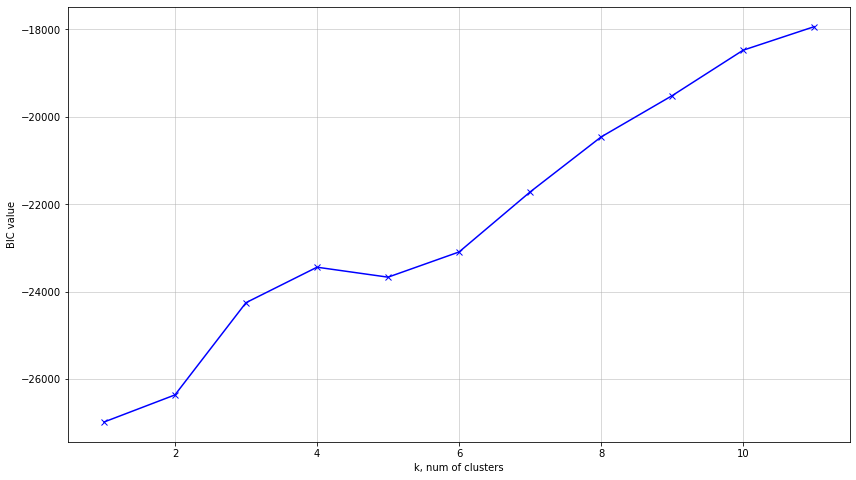

In [145]:
data = np.loadtxt('/Users/messivan/Downloads/Data/bernholdt.txt')
X = data[:,:-1]
if len(X.shape) == 1: X = X.reshape(-1,1)
y = data[:,-1].reshape(-1,1)

# We normalize both X and y with MinMaxScaler()
scaler_x = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))
scaler_x.fit(X)
scaler_y.fit(y)
X = scaler_x.transform(X)
y = scaler_y.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
DeepMixtureGPE.estimate_n_experts(np.concatenate((X,y), axis=1), criterion='BIC', random_state=11)

In [149]:
m = DeepMixtureGPE(n_experts=4, sparse_gp=0, fix_ind_pnts=0, random_state=11)
t1=time.time()
m.fit(X_train, y_train, mode='CCR', verbose=0)
t2=time.time()
t2-t1

Optimization restart 1/2, f = -209.17802645563097
Optimization restart 2/2, f = -211.01242556702755
Optimization restart 1/2, f = -170.73994532900815
Optimization restart 2/2, f = -170.73994533032874
Optimization restart 1/2, f = 1018.4023587827032
Optimization restart 2/2, f = 1018.4023587823742
Optimization restart 1/2, f = 249.7324546573309
Optimization restart 2/2, f = 315.086983575708


397.15832591056824

In [151]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 99.19 %. Soft_pred: 97.58 %.
RMSE. Hard_pred: 0.0563. Soft_pred: 0.0974.


In [155]:
m = DeepMixtureGPE(n_experts=3, sparse_gp=0, fix_ind_pnts=0, random_state=11)
t1=time.time()
m.fit(X_train, y_train, mode='MM2r', verbose=0)
t2=time.time()
t2-t1

  0%|                                                     | 0/2 [00:00<?, ?it/s]

Optimization restart 1/2, f = 1004.5441195147755
Optimization restart 2/2, f = 1004.5441195132803
Optimization restart 1/2, f = 893.7692467845463
Optimization restart 2/2, f = 893.7692470926495
Optimization restart 1/2, f = 1014.4117654331185
Optimization restart 2/2, f = 1014.4117654231175


 50%|██████████████████████                      | 1/2 [03:58<03:58, 238.75s/it]

Optimization restart 1/2, f = 133.66295229222158
Optimization restart 2/2, f = 133.66295229651314
Optimization restart 1/2, f = -2350.894552829933
Optimization restart 2/2, f = -2350.894552813671
Optimization restart 1/2, f = -1298.823537296071
Optimization restart 2/2, f = -1298.8235372848508


100%|████████████████████████████████████████████| 2/2 [10:43<00:00, 321.82s/it]


643.7044200897217

In [156]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 89.57 %. Soft_pred: 93.02 %.
RMSE. Hard_pred: 0.2021. Soft_pred: 0.1653.


In [158]:
m = DeepMixtureGPE(n_experts=2, sparse_gp=0, fix_ind_pnts=0, random_state=11)
t1=time.time()
m.fit(X_train, y_train, mode='CCR-MM', verbose=0)
t2=time.time()
t2-t1

  0%|                                                     | 0/6 [00:00<?, ?it/s]

Optimization restart 1/2, f = -141.74822451913224
Optimization restart 2/2, f = -141.7482244825701
Optimization restart 1/2, f = -370.6297411371788
Optimization restart 2/2, f = -370.6297411239707


 17%|███████▎                                    | 1/6 [07:09<35:47, 429.50s/it]

Optimization restart 1/2, f = -170.19096595750125
Optimization restart 2/2, f = -170.19096595797214
Optimization restart 1/2, f = -604.7687039963139
Optimization restart 2/2, f = -604.7687040005421


 33%|██████████████▋                             | 2/6 [14:08<28:12, 423.24s/it]

Optimization restart 1/2, f = -180.68444812560915
Optimization restart 2/2, f = -180.68444813267024
Optimization restart 1/2, f = -754.5383724388794
Optimization restart 2/2, f = -754.5383731658671


 50%|██████████████████████                      | 3/6 [21:57<22:12, 444.01s/it]

Optimization restart 1/2, f = -172.95192870920118
Optimization restart 2/2, f = -172.95192870843812
Optimization restart 1/2, f = -907.1898794604335
Optimization restart 2/2, f = -907.1898789065713


 67%|█████████████████████████████▎              | 4/6 [32:09<17:01, 510.54s/it]

Optimization restart 1/2, f = -182.88007143083905
Optimization restart 2/2, f = -182.8800714305321
Optimization restart 1/2, f = -1367.3933007601859
Optimization restart 2/2, f = -1367.393300758636


 83%|████████████████████████████████████▋       | 5/6 [42:18<09:06, 546.08s/it]

Optimization restart 1/2, f = -234.44951992339384
Optimization restart 2/2, f = -234.4495199233711
Optimization restart 1/2, f = -2774.7381627611253
Optimization restart 2/2, f = -2774.7381627850027


100%|████████████████████████████████████████████| 6/6 [48:25<00:00, 484.24s/it]


2905.708547115326

In [159]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 89.99 %. Soft_pred: 93.48 %.
RMSE. Hard_pred: 0.1980. Soft_pred: 0.1599.


In [165]:
m = DeepMixtureGPE(n_experts=2, sparse_gp=1, fix_ind_pnts=1, initial_clustering='GMM', random_state=11)
t1=time.time()
m.fit(X_train, y_train, mode='CCR', verbose=1)
t2=time.time()
t2-t1

Epoch 1/500
450/450 [==============================] - 2s 3ms/step - loss: 0.1813 - accuracy: 0.9407 - val_loss: 0.1061 - val_accuracy: 0.9588
Epoch 2/500
450/450 [==============================] - 1s 2ms/step - loss: 0.0996 - accuracy: 0.9656 - val_loss: 0.0944 - val_accuracy: 0.9650
Epoch 3/500
450/450 [==============================] - 1s 2ms/step - loss: 0.0935 - accuracy: 0.9674 - val_loss: 0.0926 - val_accuracy: 0.9688
Epoch 4/500
450/450 [==============================] - 1s 2ms/step - loss: 0.0904 - accuracy: 0.9706 - val_loss: 0.0852 - val_accuracy: 0.9700
Epoch 5/500
450/450 [==============================] - 1s 3ms/step - loss: 0.0906 - accuracy: 0.9678 - val_loss: 0.0869 - val_accuracy: 0.9675
Epoch 6/500
450/450 [==============================] - 1s 2ms/step - loss: 0.0838 - accuracy: 0.9724 - val_loss: 0.0814 - val_accuracy: 0.9688
Epoch 7/500
450/450 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9690 - val_loss: 0.0790 - val_accuracy: 0.9737

Epoch 58/500
450/450 [==============================] - 1s 1ms/step - loss: 0.0521 - accuracy: 0.9850 - val_loss: 0.0437 - val_accuracy: 0.9937
Epoch 59/500
450/450 [==============================] - 1s 1ms/step - loss: 0.0495 - accuracy: 0.9862 - val_loss: 0.0451 - val_accuracy: 0.9912
Epoch 60/500
450/450 [==============================] - 1s 1ms/step - loss: 0.0537 - accuracy: 0.9842 - val_loss: 0.0544 - val_accuracy: 0.9812
Epoch 61/500
450/450 [==============================] - 1s 1ms/step - loss: 0.0499 - accuracy: 0.9872 - val_loss: 0.0511 - val_accuracy: 0.9875
Epoch 62/500
450/450 [==============================] - 1s 1ms/step - loss: 0.0470 - accuracy: 0.9882 - val_loss: 0.0441 - val_accuracy: 0.9925
Epoch 63/500
450/450 [==============================] - 1s 1ms/step - loss: 0.0526 - accuracy: 0.9853 - val_loss: 0.0486 - val_accuracy: 0.9887
Epoch 64/500
450/450 [==============================] - 1s 1ms/step - loss: 0.0482 - accuracy: 0.9868 - val_loss: 0.0459 - val_accuracy:

Epoch 115/500
450/450 [==============================] - 1s 1ms/step - loss: 0.0482 - accuracy: 0.9875 - val_loss: 0.0419 - val_accuracy: 0.9925
Epoch 116/500
450/450 [==============================] - 1s 1ms/step - loss: 0.0436 - accuracy: 0.9904 - val_loss: 0.0461 - val_accuracy: 0.9850
Epoch 117/500
450/450 [==============================] - 1s 1ms/step - loss: 0.0418 - accuracy: 0.9901 - val_loss: 0.0439 - val_accuracy: 0.9900
Epoch 118/500
450/450 [==============================] - 1s 1ms/step - loss: 0.0434 - accuracy: 0.9903 - val_loss: 0.0346 - val_accuracy: 0.9925
Epoch 119/500
450/450 [==============================] - 1s 1ms/step - loss: 0.0409 - accuracy: 0.9918 - val_loss: 0.0436 - val_accuracy: 0.9875
Epoch 120/500
450/450 [==============================] - 1s 1ms/step - loss: 0.0466 - accuracy: 0.9874 - val_loss: 0.0432 - val_accuracy: 0.9862
Epoch 121/500
450/450 [==============================] - 1s 1ms/step - loss: 0.0414 - accuracy: 0.9910 - val_loss: 0.0377 - val_ac

Optimization restart 1/2, f = 1623.145543211911


Optimization restart 2/2, f = 1623.1136341134606


Optimization restart 1/2, f = 3709.2372904292224


Optimization restart 2/2, f = 3709.2104418604813


104.7376229763031

In [166]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 93.70 %. Soft_pred: 93.68 %.
RMSE. Hard_pred: 0.1571. Soft_pred: 0.1573.


In [81]:
m = DeepMixtureGPE(n_experts=5, sparse_gp=0, fix_ind_pnts=0, random_state=11)

In [82]:
m.fit(X_train, y_train, mode='CCR', verbose=0)

Optimization restart 1/2, f = -828.7486635480652
Optimization restart 2/2, f = -834.3229893245655
Optimization restart 1/2, f = 873.5260841711447
Optimization restart 2/2, f = 873.5260841214053


LinAlgError: not positive definite, even with jitter.